In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
import sympy as sym
from sympy.solvers.solvers import unrad
from sympy import nroots
from scipy import linalg
import scipy as sci
from scipy import optimize
from scipy import stats
from scipy.interpolate import lagrange
from scipy.optimize import root
from scipy.optimize import minimize
from scipy.optimize import fixed_point

import time 
import mpmath as mp

In [3]:
#Henon map (x,y) -> (1 - a*x**2 + b*y,x)
def hMap(a,b,x,y):
    return 1 - a*x**2 + b*y
    
#define doing the henon map n times
def hMap_n(a,b,x,y,n):
    x_i = x
    y_i = y
    
    for i in range(n):
        old_x = x_i
        old_y = y_i
        
        new_x = hMap(a,b,old_x,old_y)
        new_y = old_x
        
        x_i = new_x
        y_i = new_y
        
    x_n, y_n = x_i,y_i
    return [x_n, y_n]
def NhMap_n(a,b,x,y,n,N):
    x_i,y_i = x,y
    for i in range(N):
        x_i,y_i = hMap_n(a,b,x_i,y_i,n)
    return [x_i,y_i]

#Inverse of Henon map
def backwards_hMap(a,b,x,y):
    return -(1/b)*(1 - a*y**2 - x)
    
#get both fixed points of the system
def getPeriodic(a,b):
    p1 = (-1*(1 - b) + sym.sqrt((1-b)**2 + 4*a))/(2*a)
    p2 = (-1*(1 - b) - sym.sqrt((1-b)**2 + 4*a))/(2*a)
    return p1,p2
def getFixed_np(a,b):
    #p1 = (-1*(1 - b) + sym.sqrt((1-b)**2 + 4*a))/(2*a)
    p2 = (-1*(1 - b) - np.sqrt((1-b)**2 + 4*a))/(2*a)
    return p2
#get the unstable eigenvector
def getUnstableLin(a,b,x):
    evecUn = [-a*x + sym.sqrt(b+a**2 * x**2),1]
    return evecUn

#get stable eigenvector
def getStableLin(a,b,x):
    evecSt = [-a*x - sym.sqrt(b+a**2 * x**2),1]
    return evecSt

#get Matrix value
def getValsMat(M, t0, s0):
    return M.subs([(t,t0),(s,s0)])

def getQualityUnst(b,a,x, y):
    x_vals = np.zeros(100)
    y_vals = np.zeros(100)
    x_vals[0],y_vals[0] = x,y
    
    fp = getFixed_np(a,b)

    curr_diff = np.sqrt((x-fp)**2 + (y-fp)**2)
    toler = 0.001
    
    for i in range(100-1):
        yNew = backwards_hMap(a,b,x_vals[i],y_vals[i])
        xNew = y_vals[i]
        
        new_diff = np.sqrt((xNew-fp)**2 + (yNew-fp)**2)
        
        if i>4 and new_diff > curr_diff and new_diff > toler:
            return i
        curr_diff=new_diff
        x_vals[i+1],y_vals[i+1] = xNew, yNew
    return 0

def getQualitySt(b,a,x, y):
    x_vals = np.zeros(100)
    y_vals = np.zeros(100)
    x_vals[0],y_vals[0] = x,y
    
    fp = getFixed_np(a,b)

    curr_diff = np.sqrt((x-fp)**2 + (y-fp)**2)
    toler = 0.001
    
    for i in range(100-1):
        xNew = hMap(a,b,x_vals[i],y_vals[i])
        yNew = x_vals[i]
        
        new_diff = np.sqrt((xNew-fp)**2 + (yNew-fp)**2)
        
        if i>4 and new_diff > curr_diff and new_diff > toler:
            return i
        curr_diff=new_diff
        x_vals[i+1],y_vals[i+1] = xNew, yNew
    return 0


print('done')

done


In [4]:
#create list of b values to calculate(going up)
global b_vals
#b_vals will be defined adaptively
#a_vals = np.zeros(len(b_vals))

#symbolic variables for a and b
a = symbols('a')
b = symbols('b')

#number of iterations of henon map for symbolic equation
N = 10
print('done')

done


In [5]:
p1, p2 = getPeriodic(a,b)
p=p2
#symbolic method of generating function which is to be mapped
t = symbols('t')
s = symbols('s')

#direction vector in x and y
evecUn = getUnstableLin(a,b,p)
evecSt = getStableLin(a,b,p)

#get eigenvectors aka tangent vectors of lineariation at fixed point
dx = evecUn[0]
dy = evecUn[1]
dx_b = evecSt[0]
dy_b = evecSt[1]

#(x0, y0) for original linear equation
x0 = p
y0 = p

#(x,y) = (x(t),y(t))
linex0 = x0 + dx*t
liney0 = y0 + dy*t
linex0_b = x0 + dx_b*s
liney0_b = y0 + dy_b*s

#Iterate N times
linexi = linex0
lineyi = liney0
linexi_b = linex0_b
lineyi_b = liney0_b

for i in range(N):
    oldlinex = linexi
    oldliney = lineyi
    
    newlinex = hMap(a,b,oldlinex, oldliney)
    newliney = oldlinex
    
    linexi = newlinex
    lineyi = newliney
    
    oldlinex_b = linexi_b
    oldliney_b = lineyi_b
    
    newliney_b = backwards_hMap(a,b,oldlinex_b, oldliney_b)
    newlinex_b = oldliney_b
    
    linexi_b = newlinex_b
    lineyi_b = newliney_b 



#define stable and unstable manifolds in x and y
xu = linexi #x(t) of unstable manifold
yu = lineyi #y of unstable
xs = linexi_b #x of stable
ys = lineyi_b #y of stable

#Differentiate Them
dxudt = sym.diff(xu,t)
dyudt = sym.diff(yu,t)
dxsds = sym.diff(xs,s)
dysds = sym.diff(ys,s)  

print('done')

done


In [6]:
#numerical functions for a, b, t and s
p_n = sym.lambdify([b,a], p, "numpy")
xu_n = sym.lambdify([b,a,t], xu, "numpy")
yu_n = sym.lambdify([b,a,t], yu, "numpy")
xs_n = sym.lambdify([b,a,s], xs, "numpy")
ys_n = sym.lambdify([b,a,s], ys, "numpy")
print(1/2)

Dxu_n = sym.lambdify([b,a,t],dxudt, "numpy")
Dyu_n = sym.lambdify([b,a,t],dyudt, "numpy")
Dxs_n = sym.lambdify([b,a,s],dxsds, "numpy")
Dys_n = sym.lambdify([b,a,s],dysds, "numpy")


print('done')

0.5
done


In [7]:
#try eigenvalue-parameterized definitions of manifolds

def get_eig(b,a):
    p_val = p_n(b,a)
    
    jac = np.matrix([[-2*a*p_val, b], [1, 0]])
    
    #jac_N = np.linalg.matrix_power(jac, N)
    
    w, v = np.linalg.eig(jac)
    return w

def get_xu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    t_par = t_val / (eig**N)
    
    return xu_n(b,a,t_par)

def get_yu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    
    t_par = t_val / (eig**N)
    
    return yu_n(b,a,t_par)

def get_xs(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N)
    
    return xs_n(b,a,s_par)

def get_ys(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N) #multiply because you are dividing by the inverse eigenval
    
    return ys_n(b,a,s_par)

#DERIVATIVE VALS TOO################
def get_Dxu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    t_par = t_val / (eig**N)
    
    return Dxu_n(b,a,t_par)

def get_Dyu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    
    t_par = t_val / (eig**N)
    
    return Dyu_n(b,a,t_par)

def get_Dxs(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N)
    
    return Dxs_n(b,a,s_par)

def get_Dys(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N) #multiply because you are dividing by the inverse eigenval
    
    return Dys_n(b,a,s_par)
print('done')

done


In [8]:
def Deltax(b,a,t,s):
    return get_xu(b,a,t) - get_xs(b,a,s)
def Deltay(b,a,t,s):
    return get_yu(b,a,t) - get_ys(b,a,s)

def DeltaDxyi(b,a,t,s):
    #try normalized version
    dxdt = get_Dxu(b,a,t)
    dydt = get_Dyu(b,a,t)
    dxds = get_Dxs(b,a,s)
    dyds = get_Dys(b,a,s)
        
    unst_tan = [dxdt,dydt]/np.linalg.norm([dxdt,dydt])
    
    st_tan = [dxds,dyds]/np.linalg.norm([dxds,dyds])
    
    #dot_product = np.dot(unst_tan, -st_tan)
    #angle = np.arccos(dot_product)
    
    return np.linalg.det(np.matrix([unst_tan,st_tan]))
    #return angle

def my_F(bats):
    b,a,t,s = bats[0],bats[1],bats[2],bats[3]
    return [Deltax(b,a,t,s),Deltay(b,a,t,s)]



def my_counter(dummy1,dummy2):
    global count
    count += 1


print('done')

done


In [8]:
#a guess is from line w slope = 2.2050519410789367
from scipy.optimize.nonlin import NoConvergence
global count

density = 50000
toler = 0.0001 #best: 0.0001

b_vals = np.zeros(density, dtype = np.double)

a_vals = np.zeros(len(b_vals), dtype = np.double)
t_vals, s_vals = np.zeros(len(b_vals), dtype = np.double), np.zeros(len(b_vals), dtype = np.double)
count_vals = np.zeros(len(b_vals), dtype = np.double)
unstQual, stQual = np.zeros(len(b_vals), dtype = np.double), np.zeros(len(b_vals), dtype = np.double)
xs_tan,ys_tan = np.zeros(len(b_vals), dtype = np.double),np.zeros(len(b_vals), dtype = np.double)
xu_tan,yu_tan = np.zeros(len(b_vals), dtype = np.double),np.zeros(len(b_vals), dtype = np.double)
t_vals,s_vals = np.zeros(len(b_vals), dtype = np.double),np.zeros(len(b_vals), dtype = np.double)
total_count = 0

#Iteration bor b0
#N=11: 1.3145271100033784 ,  1.8677934291663318 ,  39.58746466644118
#N=12: ats0 = 1.314527109537821 1.8677932711841738 39.587550202200994
#N=13: ats 0 = 1.3145289042002917 ,  1.867793628321972 ,  39.58755538398396
#N=10: ts 0 = 1.3145271093258206 ,  1.8677917710196257 ,  39.58755820719475
#N=14: ats0 = 1.3146211090276902 ,  1.8677518648947236 ,  39.587540831947784


i=0
count = 0
b_vals[i] = -0.4
b_i = b_vals[i]

ats_0 = sci.array([1.0794520443182858 ,  2.2710033192300823, 35.849498983166114],dtype = np.double)
F_ats = lambda ats : [Deltax(b_i, ats[0],ats[1],ats[2]),Deltay(b_i, ats[0],ats[1],ats[2]),DeltaDxyi(b_i, ats[0],ats[1],ats[2])]
#ats_0 = optimize.newton_krylov(F_ats, [a_0,t_0,s_0 ],callback = my_counter,f_tol = 0.0001)
ats_0Info = optimize.fsolve(F_ats, ats_0,xtol = 0.0000000, epsfcn=0.000,full_output = True)
ats_0 = ats_0Info[0]
count += ats_0Info[1].get('nfev')
print(ats_0Info[3])
a_vals[i] = ats_0[0]
t_vals[i], s_vals[i] = ats_0[1],ats_0[2]
xu,yu,xs,ys = get_xu(b_i,ats_0[0],ats_0[1]), get_yu(b_i,ats_0[0],ats_0[1]),get_xs(b_i,ats_0[0],ats_0[2]), get_ys(b_i,ats_0[0],ats_0[2])
unstQual[i] = getQualityUnst(b_i,ats_0[0],xu,yu)
stQual[i] = getQualitySt(b_i,ats_0[0],xs,ys)
xs_tan[i],ys_tan[i] = xs,ys
xu_tan[i],yu_tan[i] = xu,yu
t_vals[i],s_vals[i] = ats_0[1],ats_0[2]
count_vals[i] = count
total_count+=count

print('a,t,s 0: ',ats_0[0],', ',ats_0[1],', ',ats_0[2])
print ('XY: ',get_xs(b_i,ats_0[0],ats_0[2]),get_ys(b_i,ats_0[0],ats_0[2]))
print('Error for i = 0', F_ats(ats_0))


#iteration for b1
#N=11: 1.3146436454463388 , 1.867629350144214 , 39.59069061878441
#N=12: ats 1: 1.3146408773256404, 1.8676334955487672, 39.586846721299985
#N=13: ats 1 = 1.314632711416713 ,  1.8676383216344141 ,  39.581640325010525
#N=10: ats 1: 1.3146436454592763 ,  1.8676276905166396 ,  39.590805378965555
#N=14: ats1 = 1.3146225464990968 ,  1.867881878947269 ,  39.59080664700336
i = 1
count = 0
b_vals[i] = -0.3990
b_i = b_vals[i]
a_1,t_1,s_1 = np.array([1.0818243233534817 ,  2.2660577000804243, 35.86368528683876],dtype = np.float64)
F_ats = lambda ats : [Deltax(b_i, ats[0],ats[1],ats[2]),Deltay(b_i, ats[0],ats[1],ats[2]),DeltaDxyi(b_i, ats[0],ats[1],ats[2])]
#ats_1 = optimize.newton_krylov(F_ats, [a_1,t_1,s_1],callback = my_counter,f_tol = 0.005)
ats_1Info = optimize.fsolve(F_ats, [a_1,t_1,s_1 ],xtol = 0.000000, epsfcn=0.000,full_output = True)
print(ats_1Info[3])
ats_1= ats_1Info[0]
count += ats_1Info[1].get('nfev')
a_vals[i] = ats_1[0]
t_vals[i],s_vals[i] = ats_1[1],ats_1[2]
xu,yu,xs,ys = get_xu(b_i,ats_1[0],ats_1[1]), get_yu(b_i,ats_1[0],ats_1[1]),get_xs(b_i,ats_1[0],ats_1[2]), get_ys(b_i,ats_1[0],ats_1[2])
unstQual[i] = getQualityUnst(b_i,ats_1[0],xu,yu)
xs_tan[i],ys_tan[i] = xs,ys
xu_tan[i],yu_tan[i] = xu,yu
t_vals[i],s_vals[i] = ats_1[1],ats_1[2]
stQual[i] = getQualitySt(b_i,ats_1[0],xs,ys)
print('a,t,s 1: ',ats_1[0],', ',ats_1[1],', ',ats_1[2])
print('Error for i = 1',F_ats(ats_1))
count_vals[i] = count
total_count+=count


ats_i = ats_0

direction = 1
b_end = -0.3
start_time = time.time()
max_j = 200 #150
for i in range(2,len(b_vals)):
    
    j=0 # num of iterations of newton method

    inc0  = 0.001 #good: inc0,toler = 0.004, 0.003
    toler = 0.003
    b_inc = inc0
    
    cont  = True
    
    flag  = False #Turns true if fails to converge for 100 different b
    count = 0
    while(cont):
        try:
            print(i,j)
            
            b_i = b_vals[i-1] + direction* b_inc
            
            
            F_ats = lambda ats : [Deltax(b_i, ats[0],ats[1],ats[2]),Deltay(b_i, ats[0],ats[1],ats[2]),DeltaDxyi(b_i, ats[0],ats[1],ats[2])]
                        
            slope_a = np.double((a_vals[i-1] - a_vals[i-2]) / (b_vals[i-1] - b_vals[i-2]))
            slope_t = np.double((t_vals[i-1] - t_vals[i-2]) / (b_vals[i-1] - b_vals[i-2]))
            slope_s = np.double((s_vals[i-1] - s_vals[i-2]) / (b_vals[i-1] - b_vals[i-2]))

            
            
            a_guess = a_vals[i-1] + slope_a*(b_i - b_vals[i-1])
            t_guess = t_vals[i-1] + slope_t*(b_i - b_vals[i-1])
            s_guess = s_vals[i-1] + slope_s*(b_i - b_vals[i-1])
            
            if  j > 5 and i > 10 : #if linear fit doesn't seem to be good enough
                b_array = b_vals[:i-1]
                a_array = a_vals[:i-1]
                t_array = t_vals[:i-1]
                s_array = s_vals[:i-1]
                
                a_model = np.poly1d(np.polyfit(b_array, a_array, 1))
                t_model = np.poly1d(np.polyfit(b_array, t_array, 5))
                s_model = np.poly1d(np.polyfit(b_array, s_array, 5))
                
                a_guess = a_model(b_i)
                t_guess = t_model(b_i)
                s_guess = s_model(b_i)
                
#                 b_array = np.array([b_vals[i-1],b_vals[i-2],b_vals[i-3]])
                
#                 a_array = np.array([a_vals[i-1],a_vals[i-2],a_vals[i-3]])
#                 t_array = np.array([t_vals[i-1],t_vals[i-2],t_vals[i-3]])
#                 s_array = np.array([s_vals[i-1],s_vals[i-2],s_vals[i-3]])
                
#                 a_guess = lagrange(b_array, a_array)(b_i)
#                 t_guess = lagrange(b_array, t_array)(b_i)
#                 s_guess = lagrange(b_array, s_array)(b_i)
                
            guess = [a_guess,t_guess, s_guess]
            print('b_i: ',b_i,', a guess:',a_guess)
            print('t guess: ',t_guess,' s guess: ',s_guess)
            print('xu guess: ',get_xu(b_i,a_guess,t_guess),', yu guess: ',get_yu(b_i,a_guess,t_guess))
            print('xs guess: ',get_xs(b_i,a_guess,s_guess),', ys guess: ',get_ys(b_i,a_guess,s_guess))
            
            
            #ats_i = optimize.newton_krylov(F_ats, guess,f_tol = toler,maxiter = 100,callback = my_counter)#,method = 'gmres'
            #ats_i
            #ats_i = root(F_ats, guess ,method='hybr',callback = my_counter,options = {'xtol':toler}).x
            ats_iInfo = optimize.fsolve(F_ats, guess,xtol = toler*0.01, epsfcn = 0.001,full_output = True)#0.001 epsfcn
            ats_i = ats_iInfo[0]
            
            if np.max(np.abs(F_ats(ats_i))) > toler:
                raise NoConvergence
            
            count += ats_iInfo[1].get('nfev')
            
            print(ats_i)
            count_vals[i] = count
            total_count+=count
            
            count = 0

            
            b_vals[i] = b_i
            a_vals[i] = ats_i[0]
            a_i = a_vals[i]
            t_vals[i],s_vals[i] = ats_i[1],ats_i[2]
            sol = [ats_i[1], ats_i[2]]
            
            
            #calculate quality of x,y 
            xu, yu = get_xu(b_i,a_i,sol[0]), get_yu(b_i,a_i,sol[0])
            xs, ys = get_xs(b_i,a_i,sol[1]), get_ys(b_i,a_i,sol[1])
            
            unstQual[i] = getQualityUnst(b_i,a_i,xu,yu)
            stQual[i] = getQualitySt(b_i,a_i,xs,ys)
            xs_tan[i],ys_tan[i] = xs,ys
            xu_tan[i],yu_tan[i] = xu,yu
            t_vals[i],s_vals[i] = ats_i[1],ats_i[2]
            
            print('b increment: ',b_inc)
            print('Final b,a: ',b_i,', ',a_i)
            print('t,s: ',sol)
            print('t diff, s diff: ',t_vals[i] - t_vals[i-1],', ',s_vals[i] - s_vals[i-1])
            print('Unstable XY: ', xu,', ',yu)
            print('Stable XY: ', xs,', ',ys)
            print('Number of iterations: ',count_vals[i] )
            print('Error: ',F_ats([a_i,sol[0],sol[1]]))
            print('Current Time: ',time.time() - start_time)
            print('------------------------')
            print('Next b')
            
            cont = False
            
            if b_i > b_end:
                raise KeyboardInterrupt
        except KeyboardInterrupt: 
            print('Interruption Found. Goodbye. ')
            cont = False
            flag = True
            break
        except NoConvergence: #

            j+=1
            b_inc = b_inc*0.5
            
            
                
                
                
            if j>max_j:
                print(b_vals[i-1])
                cont = False
                flag = True
                break
        except np.linalg.LinAlgError:
            j+=1
            
            raise NoConvergence
    if(flag):
        print('NO CONVERGENCE DETECTED')
        r = i-1
        break

run_length = time.time() - start_time
            

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
a,t,s 0:  1.0794520416881797 ,  2.271003305395485 ,  35.849498983161595
XY:  1.4985050280406014 -0.01692932242739087
Error for i = 0 [3.76324844619802e-07, -6.0183174689365515e-06, 8.038321234901709e-07]
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
a,t,s 1:  1.081824806913061 ,  2.2660561456724726 ,  35.86368681331833
Error for i = 1 [-7.1261969658564794e-09, 3.054263253768341e-08, -4.8105901554803785e-09]
2 0
b_i:  -0.398 , a guess: 1.0841975721379422
t guess:  2.2611089859494604  s guess:  35.87787464347507
xu guess:  1.4940176877832354 , yu guess:  -0.016804618283008832
xs guess:  1.4939839908128976 , ys guess:  -0.01652447548897277
[ 1.08419624  2.26113459 35.87828503]
b increment:  0.001
Final b,a:  -0.398 ,  1.0841962368995195
t,s:  [2.261134593861664, 35.87828502652235]
t diff, s diff:  -0.004921551810808555 ,  0

[ 1.11025503  2.20843337 36.06666264]
b increment:  0.001
Final b,a:  -0.387 ,  1.1102550292374143
t,s:  [2.2084333652373567, 36.06666264234424]
t diff, s diff:  -0.004683888827813121 ,  0.01924141633970322
Unstable XY:  1.4699855749000248 ,  -0.016015539028646053
Stable XY:  1.4699849914652356 ,  -0.01600713368506666
Number of iterations:  5.0
Error:  [5.834347891475744e-07, -8.405343579393626e-06, 7.650441349733629e-07]
Current Time:  3.4141409397125244
------------------------
Next b
14 0
b_i:  -0.386 , a guess: 1.1126217240120244
t guess:  2.2037494764095436  s guess:  36.085904058683944
xu guess:  1.4678557235802756 , yu guess:  -0.015958690798832276
xs guess:  1.4678206745308329 , ys guess:  -0.015649851158922697
[ 1.11262122  2.20377043 36.08633698]
b increment:  0.001
Final b,a:  -0.386 ,  1.112621216180368
t,s:  [2.203770425058645, 36.08633697808404]
t diff, s diff:  -0.004662940178711494 ,  0.019674335739800597
Unstable XY:  1.46785449156443 ,  -0.01594665438182341
Stable XY:

[ 1.13861972  2.15381445 36.33131999]
b increment:  0.001
Final b,a:  -0.375 ,  1.138619715528208
t,s:  [2.153814446215123, 36.33131998731665]
t diff, s diff:  -0.00444264122667537 ,  0.02446067375799288
Unstable XY:  1.4449725035710106 ,  -0.015205639895933931
Stable XY:  1.4449721891694747 ,  -0.015198754384714519
Number of iterations:  5.0
Error:  [3.1440153591688613e-07, -6.885511219412166e-06, 7.413534034154636e-07]
Current Time:  6.4996888637542725
------------------------
Next b
26 0
b_i:  -0.374 , a guess: 1.140980981051342
t guess:  2.149371804988448  s guess:  36.35578066107464
xu guess:  1.442942934571847 , yu guess:  -0.015150883899238687
xs guess:  1.442907805575833 , ys guess:  -0.014828586427903865
[ 1.14098052  2.14939108 36.35622604]
b increment:  0.001
Final b,a:  -0.374 ,  1.1409805205189552
t,s:  [2.1493910797251194, 36.3562260418792]
t diff, s diff:  -0.004423366490003744 ,  0.024906054562549684
Unstable XY:  1.4429418287998899 ,  -0.015139749295541183
Stable XY:  

[ 1.1669205   2.10196855 36.65990663]
b increment:  0.001
Final b,a:  -0.363 ,  1.1669204963790965
t,s:  [2.101968548793399, 36.659906634371]
t diff, s diff:  -0.004219758193328094 ,  0.02989398255773068
Unstable XY:  1.4211229542087347 ,  -0.014430414524058577
Stable XY:  1.4211224616681821 ,  -0.014420838395873836
Number of iterations:  5.0
Error:  [4.925405525657567e-07, -9.576128184741323e-06, 6.925970402101136e-07]
Current Time:  9.55532693862915
------------------------
Next b
38 0
b_i:  -0.362 , a guess: 1.1692764678279017
t guess:  2.097748790600071  s guess:  36.68980061692873
xu guess:  1.4191862937946387 , yu guess:  -0.01437761582323338
xs guess:  1.4191505425365543 , ys guess:  -0.014035524573450081
[ 1.16927609  2.0977665  36.69026627]
b increment:  0.001
Final b,a:  -0.362 ,  1.1692760885172007
t,s:  [2.0977664982385638, 36.69026626936122]
t diff, s diff:  -0.004202050554835246 ,  0.03035963499021932
Unstable XY:  1.419185292545742 ,  -0.014367298520763017
Stable XY:  1.

[ 1.19515937  2.05268677 37.05539524]
b increment:  0.001
Final b,a:  -0.351 ,  1.1951593732634531
t,s:  [2.0526867708313974, 37.05539523841435]
t diff, s diff:  -0.004013526428766845 ,  0.03560395661329352
Unstable XY:  1.3983522542485862 ,  -0.01368734237636815
Stable XY:  1.3983520369772182 ,  -0.013679379121269892
Number of iterations:  5.0
Error:  [2.1727136800819835e-07, -7.96325509825821e-06, 6.770382555257027e-07]
Current Time:  12.673857927322388
------------------------
Next b
50 0
b_i:  -0.35 , a guess: 1.1975102495703958
t guess:  2.0486732444026305  s guess:  37.09099919502764
xu guess:  1.39650183691277 , yu guess:  -0.013636383887399628
xs guess:  1.396466037827065 , ys guess:  -0.013279059030981066
[ 1.19750994  2.04868956 37.09147845]
b increment:  0.001
Final b,a:  -0.35 ,  1.1975099391757913
t,s:  [2.048689561785951, 37.09147845371792]
t diff, s diff:  -0.003997209045446315 ,  0.03608321530357017
Unstable XY:  1.3965009310351784 ,  -0.013626802153079876
Stable XY:  1

[ 1.22333825  2.0057808  37.52153013]
b increment:  0.001
Final b,a:  -0.33899999999999997 ,  1.2233382511157518
t,s:  [2.005780799612562, 37.521530125517444]
t diff, s diff:  -0.003822355728754445 ,  0.04164747970436622
Unstable XY:  1.376583951769304 ,  -0.012974152392634997
Stable XY:  1.3765842146236862 ,  -0.012970316742532946
Number of iterations:  5.0
Error:  [-2.6285438226025803e-07, -3.835650102050961e-06, 6.725921696085376e-07]
Current Time:  15.760715007781982
------------------------
Next b
62 0
b_i:  -0.33799999999999997 , a guess: 1.2256842473327576
t guess:  2.0019584438838076  s guess:  37.56317760522181
xu guess:  1.3748137463047072 , yu guess:  -0.012924927124826846
xs guess:  1.3747759037876632 , ys guess:  -0.012531429428609745
[ 1.22568381  2.0019738  37.56370114]
b increment:  0.001
Final b,a:  -0.33799999999999997 ,  1.225683808480949
t,s:  [2.0019738009751107, 37.56370113711589]
t diff, s diff:  -0.0038069986374513753 ,  0.04217101159844816
Unstable XY:  1.37481

[ 1.24911766  1.96472517 38.01482187]
b increment:  0.001
Final b,a:  -0.32799999999999996 ,  1.2491176644289674
t,s:  [1.9647251726339146, 38.014821866636275]
t diff, s diff:  -0.0036591478076104522 ,  0.047552035092827794
Unstable XY:  1.3574510335628092 ,  -0.012344890208368264
Stable XY:  1.3574507737433188 ,  -0.012334944787171287
Number of iterations:  5.0
Error:  [2.598194903669082e-07, -9.945421196977389e-06, 5.994031661399546e-07]
Current Time:  18.560078144073486
------------------------
Next b
73 0
b_i:  -0.32699999999999996 , a guess: 1.2514593877417233
t guess:  1.961066024826304  s guess:  38.0623739017291
xu guess:  1.3557495378277906 , yu guess:  -0.012297170921015121
xs guess:  1.3557094291401788 , ys guess:  -0.011864277827021734
[ 1.25145873  1.96108074 38.06294658]
b increment:  0.001
Final b,a:  -0.32699999999999996 ,  1.2514587293613977
t,s:  [1.961080735520105, 38.06294658117993]
t diff, s diff:  -0.0036444371138095732 ,  0.04812471454365408
Unstable XY:  1.35574

[ 1.27484934  1.92540367 38.57566655]
b increment:  0.001
Final b,a:  -0.31699999999999995 ,  1.2748493391924252
t,s:  [1.9254036716315277, 38.575666550734475]
t diff, s diff:  -0.003506228385787624 ,  0.05389234505666707
Unstable XY:  1.3390536312752293 ,  -0.011737569894068045
Stable XY:  1.3390525552402497 ,  -0.011717352840067483
Number of iterations:  5.0
Error:  [1.0760349795635449e-06, -2.021705400056216e-05, 5.183792482808101e-07]
Current Time:  21.362421989440918
------------------------
Next b
84 0
b_i:  -0.31599999999999995 , a guess: 1.2771868315536912
t guess:  1.92189744324574  s guess:  38.62955889579114
xu guess:  1.3374166589405836 , yu guess:  -0.011691274186335088
xs guess:  1.3373748088738986 , ys guess:  -0.011220925933248754
[ 1.27718612  1.92191133 38.6301745 ]
b increment:  0.001
Final b,a:  -0.31599999999999995 ,  1.277186116898594
t,s:  [1.9219113347578036, 38.63017450047658]
t diff, s diff:  -0.003492336873724078 ,  0.054507949742102824
Unstable XY:  1.337416

[ 1.30053451  1.88770714 39.20922161]
b increment:  0.001
Final b,a:  -0.30599999999999994 ,  1.3005345111314444
t,s:  [1.887707142824193, 39.20922161080915]
t diff, s diff:  -0.003362887276220361 ,  0.06075388607852972
Unstable XY:  1.3213472087572349 ,  -0.011150879608359698
Stable XY:  1.3213460070948837 ,  -0.01112714363033351
Number of iterations:  5.0
Error:  [1.2016623511801328e-06, -2.3735978026188237e-05, 4.863950398609335e-07]
Current Time:  24.727179050445557
------------------------
Next b
95 0
b_i:  -0.30499999999999994 , a guess: 1.302867920974072
t guess:  1.8843442555479726  s guess:  39.26997549688768
xu guess:  1.3197708988702934 , yu guess:  -0.011105935690987057
xs guess:  1.3197278143956654 , ys guess:  -0.010600976036687675
[ 1.3028672   1.88435733 39.27062854]
b increment:  0.001
Final b,a:  -0.30499999999999994 ,  1.3028671983546691
t,s:  [1.8843573344738636, 39.27062853863071]
t diff, s diff:  -0.0033498083503293863 ,  0.0614069278215581
Unstable XY:  1.3197703

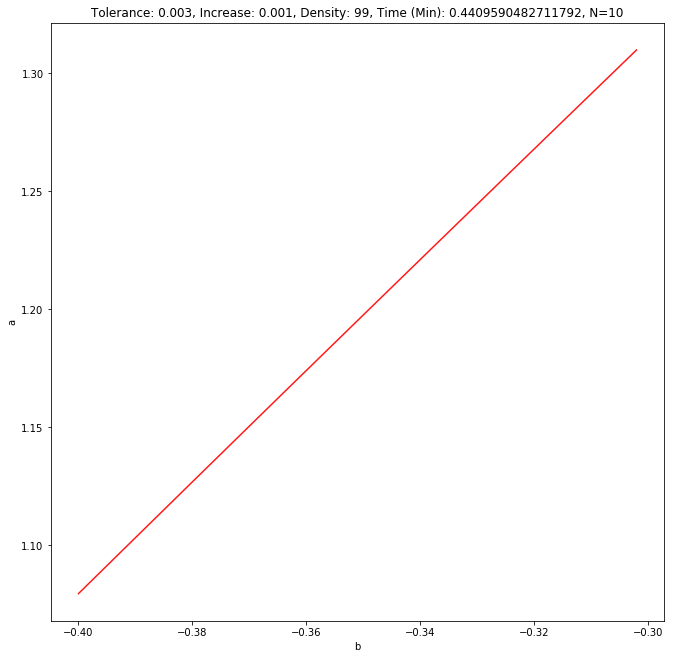

In [9]:
my_b = np.zeros(r)
my_a = np.zeros(r)
my_count = np.zeros(r)
my_stQ, my_unstQ = np.zeros(r),np.zeros(r)
my_xs,my_ys = np.zeros(r),np.zeros(r)
my_xu,my_yu = np.zeros(r),np.zeros(r)
my_t,my_s = np.zeros(r),np.zeros(r)
for i in range(r):
    my_b[i] = b_vals[i]
    my_a[i] = a_vals[i]
    my_count[i] = count_vals[i]
    my_stQ[i],my_unstQ[i] = stQual[i],unstQual[i]
    my_xs[i],my_ys[i] = xs_tan[i],ys_tan[i]
    my_xu[i],my_yu[i] = xu_tan[i],yu_tan[i]
    my_t[i],my_s[i] = t_vals[i],s_vals[i]



fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1)  
# midx, midy = 0,0
# lim = 2
# plt.xlim([midx-lim,midx+lim])
# plt.ylim([midy-lim,midy+lim])
plt.title('Tolerance: '+ str(toler) + ', Increase: ' + str(inc0)+', Density: '+str(r)+', Time (Min): '+str(run_length/60)+', N='+str(N))

plt.xlabel('b') 
plt.ylabel('a')
plt.plot(my_b, my_a, '-', color='red', alpha = 0.9, markersize=3,)

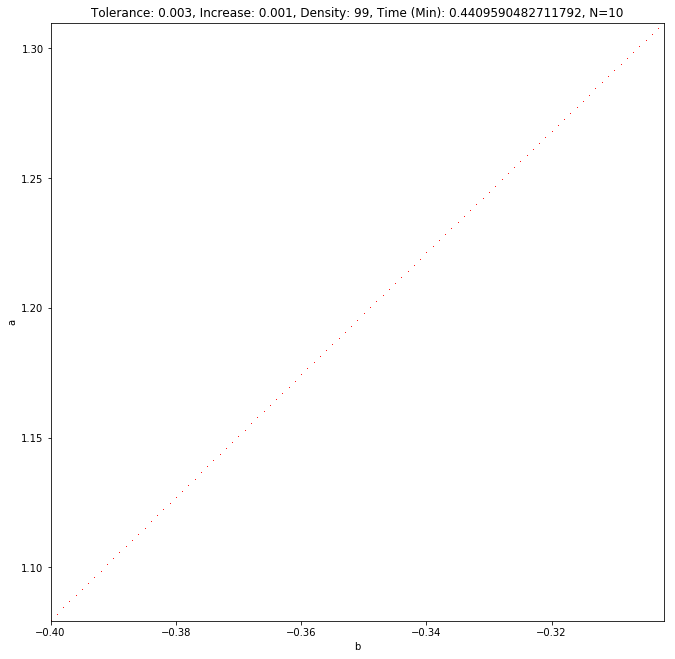

In [10]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1)  
midx, midy = -0.275,1.35
lim = 0.07
plt.xlim(np.min(my_b),np.max(my_b))
plt.ylim(np.min(my_a),np.max(my_a))


#plt.ylim([my_a[0],my_a[r-1]])
plt.title('Tolerance: '+ str(toler)+', Increase: '+str(inc0)+', Density: '+str(r)+', Time (Min): '+str(run_length/60)+', N='+str(N))

plt.xlabel('b') 
plt.ylabel('a')
plt.plot(my_b, my_a, ',', color='red', alpha = 0.9, markersize=5)



5.6767676767676765
[5.]
576


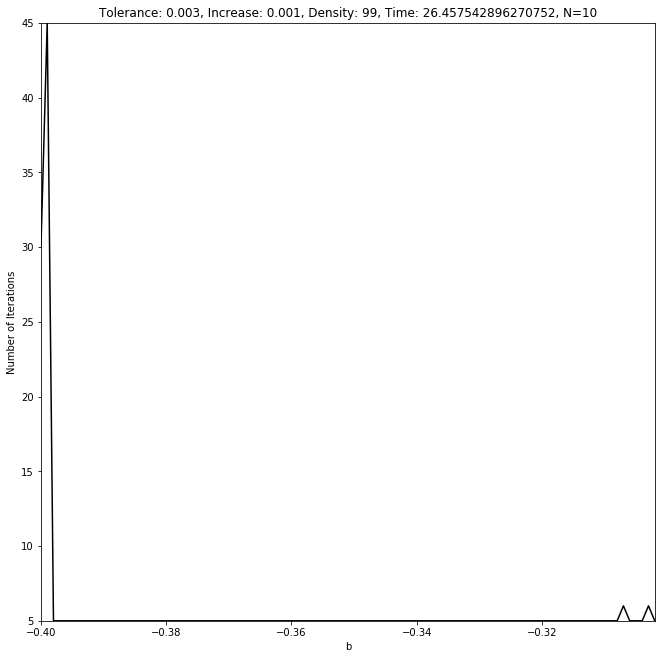

In [11]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('Number of Iterations')
plt.title('Tolerance: '+ str(toler) + ', Increase: ' + str(inc0)+', Density: '+str(r)+', Time: '+str(run_length)+', N='+str(N))
plt.xlim(np.min(my_b),np.max(my_b))
plt.ylim(np.min(my_count),np.max(my_count))
plt.plot(my_b, my_count, '-',color='black')
print(np.mean(my_count))
print(sci.stats.mode(my_count)[0])
print(total_count)

13.323232323232324
22.626262626262626


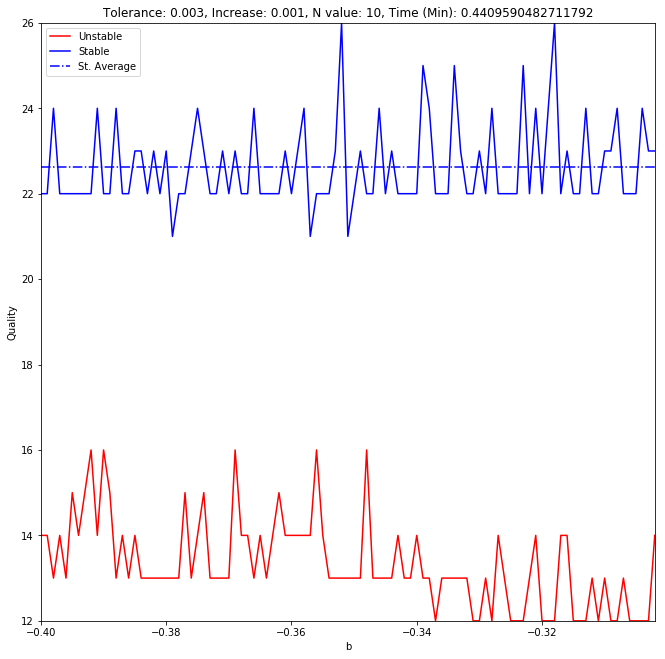

In [12]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('Quality')
plt.title('Tolerance: '+ str(toler) + ', Increase: ' + str(inc0)+', N value: '+str(N)+', Time (Min): '+str(run_length/60))

plt.xlim(np.min(my_b),np.max(my_b))
plt.ylim(np.min(my_unstQ),np.max(my_stQ))

plt.plot(my_b, my_unstQ, '-',color='red')
plt.plot(my_b, my_stQ,'-',color='blue')
plt.plot(my_b, [np.mean(my_stQ)]*r,'-.',color='blue')
plt.legend(['Unstable','Stable','St. Average'])
print(np.mean(my_unstQ))
print(np.mean(my_stQ))



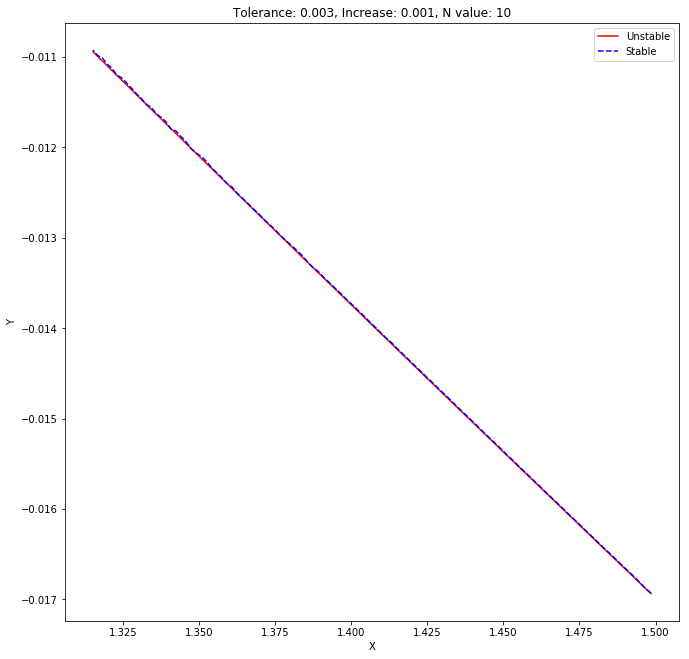

In [13]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('X') 
plt.ylabel('Y')
plt.title('Tolerance: '+ str(toler) + ', Increase: ' + str(inc0)+', N value: '+str(N))
plt.plot(my_xu, my_yu, '-',color='red')
plt.plot(my_xs, my_ys, '--',color='blue')


plt.legend(['Unstable','Stable'])

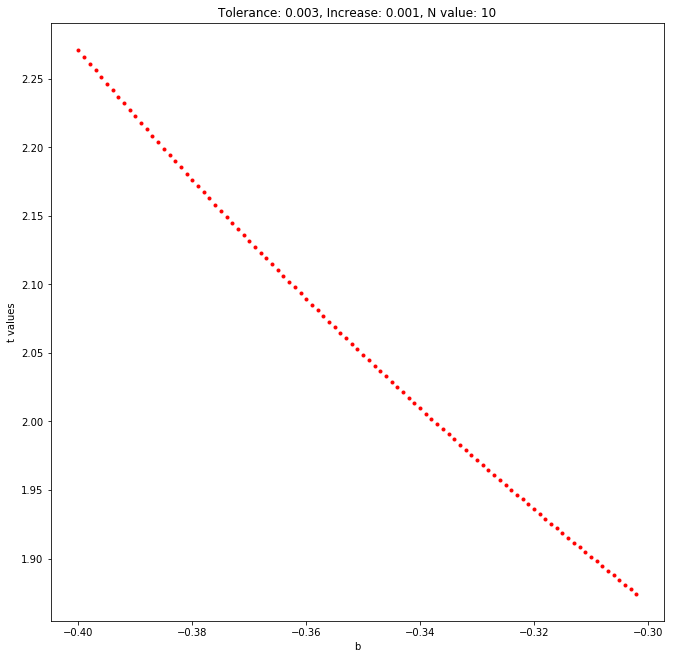

In [14]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1)

plt.xlabel('b') 
plt.ylabel('t values')
plt.title('Tolerance: '+ str(toler) + ', Increase: ' + str(inc0)+', N value: '+str(N))

#model_t = np.poly1d(np.polyfit(np.log(my_b), my_t,5))

plt.plot(my_b, my_t, '.',color='red')

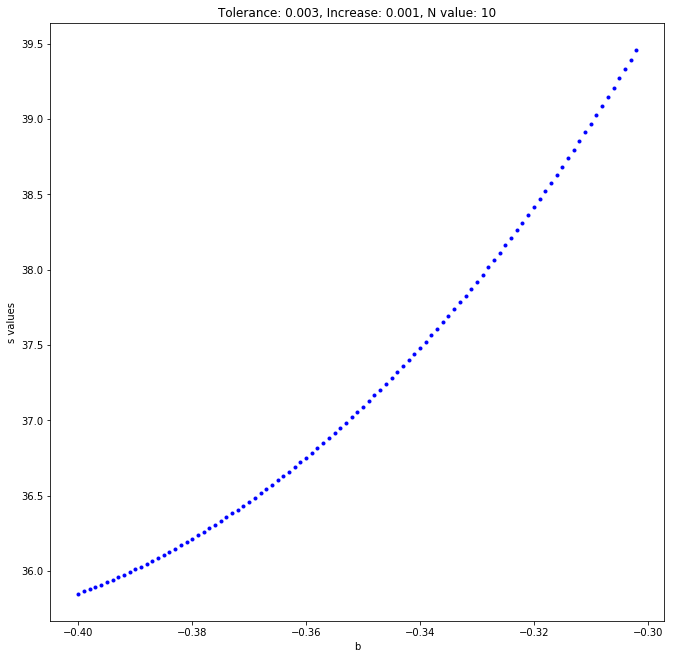

In [15]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('s values')
plt.title('Tolerance: '+ str(toler) + ', Increase: ' + str(inc0)+', N value: '+str(N))


#model_s = np.poly1d(np.polyfit(my_b, my_s, 3))


plt.plot(my_b, my_s, '.',color='blue')

In [ ]:
#save b,a files
N10para_ba = open("N10para_ba.txt", "w")
for i in range(r):
    np.savetxt(N10para_ba, [my_b[i],my_a[i]])

N10para_ba.close()
N10para_xy = open("N10para_xy.txt", "w")
for i in range(r):
    np.savetxt(N10para_xy, [my_xs[i],my_ys[i]])
N10para_xy.close()

In [22]:
b_val, a_0 =  -0.4 ,  1.0794520416881797
a = symbols('a')
q = [1.4985051588999863 ,  -0.016933543590010865] #given tangent point
s_tan = 35.84950070075259 #corresponding parameter on stable manifold

#two points to the left of the stable manifold and connect with a line.

diff = 0.3
lp1_y = get_ys(b_val,a_0, s_tan-diff) #two y coordinates for line with tangent between them
lp2_y = get_ys(b_val,a_0, s_tan+diff)

#r is distance from stable manifold to this new line
r = 0.0265
lp1_x = get_xs(b_val,a_0, s_tan-diff)-r
lp2_x = get_xs(b_val,a_0, s_tan+diff)-r

u= symbols('u') #parameter for line

dx = lp2_x - lp1_x
dy = lp2_y - lp1_y

print('dx,dy: ',dx, ', ',dy)
l_rX = lp1_x + u * dx
l_rY = lp1_y + u * dy

#get starting first pivot point to have the same y value as tangent
pivot_y = q[1]
para_pivot = sym.solve(l_rY - pivot_y, u)[0]
pivot_x = l_rX.subs(u, para_pivot)

print('pivot u: ',para_pivot)
print('pivot x,y: ',pivot_x, pivot_y)



#use pivot along with line to get perpendicular line
dx_perp = -dy
dy_perp = dx

#line of interest to be mapped
l_rXperp = pivot_x + u*dx_perp
l_rYperp = pivot_y + u*dy_perp

#apply henon n times to perp line
n=4

linexi_p = l_rXperp
lineyi_p = l_rYperp
for i in range(n):
    oldlinex_p = linexi_p
    oldliney_p = lineyi_p
    
    newlinex_p = hMap(a,b_val,oldlinex_p, oldliney_p)
    newliney_p = oldlinex_p
    
    linexi_p = newlinex_p
    lineyi_p = newliney_p

pbola_x = linexi_p
pbola_y = lineyi_p

dx,dy:  0.04775019104769074 ,  -0.4023642912429509
pivot u:  0.496812819415520
pivot x,y:  1.47182183680206 -0.016933543590010865


In [23]:
#find derivative of parabola expression
dx_p_sym = sym.diff(pbola_x,u)
dy_p_sym = sym.diff(pbola_y,u)

#lambdify the expressions for faster running time
x_p = sym.lambdify([a,u], pbola_x, "numpy")
y_p = sym.lambdify([a,u], pbola_y, "numpy")

dx_p = sym.lambdify([a,u], dx_p_sym, "numpy")
dy_p = sym.lambdify([a,u], dy_p_sym, "numpy")


x_l = sym.lambdify([a,u], l_rXperp, "numpy")
y_l = sym.lambdify([a,u], l_rYperp, "numpy")
print('done')

done


In [24]:
#print current pivot location, and after n turns
u_piv = 0.496801119246551 #value of parameter for pivot for line
u_perp_piv = sym.solve(l_rYperp - pivot_y, u)[0]

my_pivX, my_pivY = x_l(a_0, u_perp_piv),y_l(a_0, u_perp_piv)
pivn_x, pivn_y = hMap_n(a_0,b_val, pivot_x,pivot_y, 4)

print(pivot_x, pivot_y)
print(x_l(a_0, u_perp_piv),y_l(a_0, u_perp_piv))
print(x_p(a_0, u_perp_piv),y_p(a_0, u_perp_piv))
print(hMap_n(a_0,b_val, pivot_x,pivot_y, 4))

1.47182183680206 -0.016933543590010865
1.47182183680206 -0.0169335435900109
0.716815688652987 -0.905098913180562
[0.716815688652918, -0.905098913180600]


In [13]:
def getTraceDFn(a,b,px, py, n):
    global b_val
    DF = np.array([[-2*a*px, b],[1,0]])
    
    vals_px, vals_py = np.zeros(n+1),np.zeros(n+1)
    vals_px[0],vals_py[0] = px,py
    for i in range(1,n+1):
        px_old = px
        
        px = hMap(a,b,px,py)
        py = px_old
        
        vals_px[i],vals_py[i] = px,py
        
    for i in range(0,n+1):
        if n-i == 0: break
        
        DF_i =  np.array([[-2*a*vals_px[n-i], b],[1,0]])
        DF = sci.matmul(DF, DF_i)#DF_i.dot(DF)
        
        
    return np.trace(DF)



In [12]:
def deltatauX(t0_x, tn_x):
    global b_val
    return t0_x - tn_x
def deltatauY(t0_y, tn_y):
    global b_val
    return t0_y - tn_y
def deltapivX(piv0_x, pivn_x):
    global b_val
    return piv0_x - pivn_x
def deltapivY(piv0_y, pivn_y):
    global b_val
    return piv0_y - pivn_y

def getTraceDFn(a,b,px, py, n):
    global b_val
    DF = np.array([[-2*a*px, b],[1,0]])
    
    vals_px, vals_py = np.zeros(n+1),np.zeros(n+1)
    vals_px[0],vals_py[0] = px,py
    for i in range(1,n+1):
        px_old = px
        
        px = hMap(a,b,px,py)
        py = px_old
        
        vals_px[i],vals_py[i] = px,py
        
    for i in range(0,n+1):
        if n-i == 0: break
        
        DF_i =  np.array([[-2*a*vals_px[n-i], b],[1,0]])
        DF = sci.matmul(DF, DF_i)#DF_i.dot(DF)
        
        
    return np.trace(DF)

def getdxdy_p(a,u):
    global b_val
    return dx_p(a,u)/dy_p(a,u)

def getDeltadxdy_p(m,a,u):
    global b_val
    return m - getdxdy_p(a,u)

def getTau_u(m,a,y_p,dx_p,dy_p,y_curr):
    global b_val
    F = lambda u: m -  dx_p(a,u)/dy_p(a,u)
    #get u_guess by choosing u with current y value on parabolic curve.
    F_y = lambda u:y_curr - y_p(a,u)
    u_guess = optimize.fsolve(F_y, 0)

    u_new = optimize.fsolve(F, u_guess)

    return u_new


#print(getdxdy_p(-0.08661918))
#print('Derivative error: ',getDeltadxdy_p(dx/dy, -0.08661918))


tau_u =  getTau_u(1/(-20),a_0, y_p,dx_p,dy_p,0)
tau_x, tau_y = x_p(a_0,tau_u), y_p(a_0,tau_u)
print(tau_u)
print("D: ",dx_p(a_0,tau_u) , dy_p(a_0,tau_u),dx_p(a_0,tau_u) / dy_p(a_0,tau_u))
print(tau_x, tau_y)
#print(getTraceDFn(a_val-0.03,b_val, my_pivX, my_pivY, 4))        
    

dpX = deltapivX(my_pivX, pivn_x)
dpY = deltapivY(my_pivY, pivn_y)
print(dpX, dpY)

NameError: name 'a_0' is not defined

In [285]:
#define our error function in R^5
n=4

def getTau_u(m,a,b,y_p,dx_p,dy_p,x_curr,y_curr):
    global n

    
    F = lambda u: m -  dx_p(a,b,u,x_curr,y_curr)/dy_p(a,b,u,x_curr,y_curr)
    #get u_guess by choosing u with current y value on parabolic curve.
    F_y = lambda u:y_curr - y_p(a,b,u,x_curr,y_curr)
    u_guess = optimize.fsolve(F_y, 0)
    
    u_new = optimize.fsolve(F, u_guess,xtol=0)
    
    #u_new = optimize.fsolve(F, 0) #?
    #print('u0, u1: ',u_guess, u_new)
    return u_new

pivX, pivY = symbols('pivX'),symbols('pivY')
a,b = symbols('a'),symbols('b')
u = symbols('u')
l_rX = pivX + u * dx
l_rY = pivY + u * dy
dx_perp = -dy
dy_perp = dx
#line of interest to be mapped
l_rXperp = pivX+ u*dx_perp
l_rYperp = pivY + u*dy_perp

linexi_p = l_rXperp
lineyi_p = l_rYperp

for i in range(n):
    oldlinex_p = linexi_p
    oldliney_p = lineyi_p


    newlinex_p = hMap(a,b,oldlinex_p, oldliney_p)
    newliney_p = oldlinex_p

    linexi_p = newlinex_p
    lineyi_p = newliney_p

pbola_x = linexi_p
pbola_y = lineyi_p

#find derivative of parabola expression
dx_p_sym = sym.diff(pbola_x,u)
dy_p_sym = sym.diff(pbola_y,u)

#lambdify the expressions for faster running time
x_p = sym.lambdify([a,b,u,pivX,pivY], pbola_x, "numpy")
y_p = sym.lambdify([a,b,u,pivX,pivY], pbola_y, "numpy")

dx_p = sym.lambdify([a,b,u,pivX,pivY], dx_p_sym, "numpy")
dy_p = sym.lambdify([a,b,u,pivX,pivY], dy_p_sym, "numpy")

u_piv = sym.solve(l_rYperp - pivY, u)


def F_sink(apdxdy):
    global b_val
    global n
    
    a_j,pivot_x,pivot_y,dx,dy = apdxdy[0],apdxdy[1],apdxdy[2],apdxdy[3],apdxdy[4]    
    
    #get u of pivot on perpindicular line
    u_piv = sym.solve(l_rYperp - pivot_y, u)
    
    #get u of tangency on parabolic manifold

    
    u_tau = getTau_u(dx/dy,a_j,b_val,y_p,dx_p,dy_p,pivot_x,pivot_y)

    x_tau, y_tau = x_p(a_j,b_val, u_tau,pivot_x,pivot_y), y_p(a_j,b_val, u_tau,pivot_x,pivot_y)
    #print(x_tau, ',',y_tau)
    DifftauX , DifftauY = deltatauX(x_tau,pivot_x),deltatauY(y_tau,pivot_y)
    xn, yn = NhMap_n(a_j,b_val,pivot_x,pivot_y,n,5)
    DiffpivX, DiffpivY = deltapivX(pivot_x,xn), deltapivY(pivot_y,yn)
    trDFn = getTraceDFn(a_j,b_val,pivot_x, pivot_y,n)
    return [.5*DifftauX, .5*DifftauY, 2*DiffpivX, 2*DiffpivY, 5*trDFn]
b_val = -0.4
print(F_sink([1.0794520416881797,1.47182183680206, -0.016933543590010865,0.42842933, -8.56858654]))

b_val = -0.3998
print(F_sink([1.0794520416881797,1.47182183680206, -0.016933543590010865,0.42842933, -8.56858654]))

[array([0.00169178]), array([-0.01797043]), 1.919836088861901, -1.0597499195090405, 445.7183458191091]
[array([0.00155469]), array([-0.0179535]), 1.9197810973769562, -1.0598445780248222, 445.8341194510174]


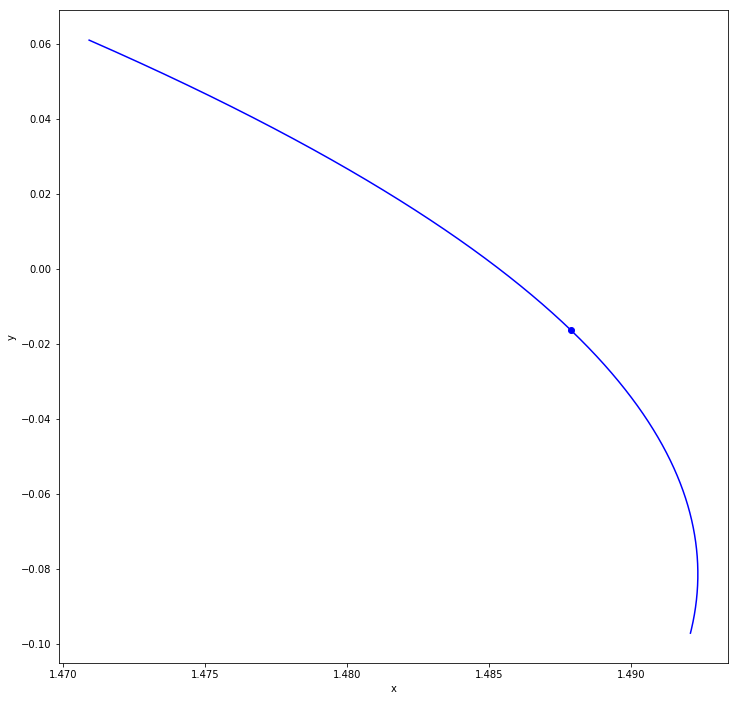

In [277]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 
my_u = np.linspace(-0.01,0.01,10000)
my_x = np.zeros(10000)
my_y = np.zeros(10000)
for i in range(10000):
    my_x[i] = x_p(1.023495303733682,-0.4004875,my_u[i],1.4878898764973796, -0.016358519168480634)
    my_y[i] = y_p(1.023495303733682,-0.4004875,my_u[i],1.4878898764973796, -0.016358519168480634)
ax.plot(my_x,my_y,'-',color='blue')
ax.plot([1.4878898765094393], [-0.016358519256419957],'o',color='blue')

for i in range(10000):
    my_x[i] = x_p(1.02501819,-0.3998,my_u[i],1.4878898764973796, -0.016358519168480634)
    my_y[i] = y_p(1.02501819,-0.3998,my_u[i],1.4878898764973796, -0.016358519168480634)
#ax.plot(my_x,my_y,'--',color='red')
#ax.plot([1.48648871], [ -1.63088318e-02],'o',color='red')


In [275]:
global b_val
global n

b_val = -0.4004875
n=4
sink4_i = optimize.fsolve(F_sink,[1.023495303733682,1.4878898764973796 ,-0.016358519168480634,0.39207057880080565,0.9199351396912726],xtol = 0,epsfcn = 0)
print(sink4_i[0],sink4_i[1],sink4_i[2],sink4_i[3],sink4_i[4])
print(F_sink(sink4_i))


b_val = -0.3998
n=4
sink4_i = optimize.fsolve(F_sink,[1.025018186019386,1.4864887065288912, -0.016308831817885,81.38638083168566,-14179.722663721257],xtol = 0,epsfcn = 0)
print(sink4_i[0],sink4_i[1],sink4_i[2],sink4_i[3])
print(F_sink(sink4_i))

1.4878898765094393 -0.016358519256419957
1.4878898765094393 -0.016358519256419957
1.4878898765094393 -0.016358519256419957
1.4490848836275108 -0.2842065595264973
1.4490848875385773 -0.28420656416631074
1.4878927931965258 -0.01637979094302322
1.4878898765094393 -0.016358519256419957
1.4878898765094393 -0.016358519256419957
1.4878898936186569 -0.01635864401424003
1.4878898764159907 -0.01635851857500148
1.4490848836275108 -0.2842065595264973
1.4490848875385773 -0.28420656416631074
1.4878927931965258 -0.01637979094302322
1.4878898765094393 -0.016358519256419957
1.4878898765094393 -0.016358519256419957
1.4878898936186569 -0.01635864401424003
1.4878898764159907 -0.01635851857500148
1.487889876415821 -0.016358518573764247
1.487889876415821 -0.016358518573764247
1.487889876415821 -0.016358518573764247
1.4878898764158328 -0.016358518573849956
1.487889876578913 -0.01635851976301428
1.487889876578913 -0.01635851976301428
1.023495303733682 1.4878898764973796 -0.016358519168480634 0.392070578800805

In [163]:
sink4 = sink4_i
print(F_sink(sink4))
a_sink = sink4[0]
piv_x = sink4[1]
piv_y = sink4[2]
sinkdx = sink4[3]
sinkdy = sink4[4]

print('a: ',a_sink)
print('dx: ',sinkdx)
print('dy: ',sinkdy)

print('p: ',piv_x,', ',piv_y)
print('4p: ',hMap_n(a_sink,b_val,piv_x,piv_y,n))
print('4*1000p: ',NhMap_n(a_sink,b_val,piv_x,piv_y,4,1000))
true_p = NhMap_n(a_sink,b_val,piv_x,piv_y,4,1000)
print('^Trace DF4: ',getTraceDFn(a_sink,b_val,true_p[0],true_p[1],4))

[array([-2.34929631e-10]), array([1.71463988e-09]), 1.496580637194711e-12, -8.50075912439685e-12, -1.8037255716807366e-12]
a:  1.0250181860188607
dx:  1026791.8208057345
dy:  -951058.0902455808
p:  1.4864887065293986 ,  -0.016308831817882233
4p:  [1.4864887065290562, -0.016308831817900216]
4*1000p:  [1.4864887065279024, -0.016308831809385693]
^Trace DF4:  -1.0158387291070436e-09


In [280]:
#moving b_i, getting sink points

global b_val
global n


p0 = 1
p1 = 0

Total = 1000
b_i = np.zeros(Total)
b_i[p0] = -0.4004875
b_i[p1] = -0.3994875

inc = 0.001



a_nsink = np.zeros(len(b_i))
px_nsink = np.zeros(len(b_i)) 
py_nsink = np.zeros(len(b_i))
dx_nsink = np.zeros(len(b_i))
dy_nsink = np.zeros(len(b_i))
p_errorn = np.zeros(len(b_i))


a_nsink[p0]  = 1.023495303733682
px_nsink[p0] = 1.4878898764973796 
py_nsink[p0] =  -0.016358519168480634
dx_nsink[p0] = 0.39207057880080565
dy_nsink[p0] = 0.9199351396912726




a_nsink[p1]  =  1.0257105230287613
px_nsink[p1] =  1.4858528692272166 
py_nsink[p1] = -0.01628629624479622
dx_nsink[p1] = 408155.1721520853
dy_nsink[p1] = 957675.23913139

direction = 1
for i in range(2,Total):
    global b_val
    global n
    
    n=4
    j=0
    
    cont = True
    flag = False
    
    b_inc = inc
    
    while(cont):
        try:
            
            print('i, j: ',i, j)
    
 
        
            b_i[i] = b_i[i-1] + direction * b_inc
            b_val = b_i[i]

            slope_a = np.double((a_nsink[i-1] - a_nsink[i-2]) / (b_i[i-1] - b_i[i-2]))
            slope_px = np.double((px_nsink[i-1] - px_nsink[i-2]) / (b_i[i-1] - b_i[i-2]))
            slope_py = np.double((py_nsink[i-1] - py_nsink[i-2]) / (b_i[i-1] - b_i[i-2]))


            step = 1

            a_guess = a_nsink[i-1] + step*slope_a*(b_i[i] - b_i[i-1])
            px_guess = px_nsink[i-1] + step*slope_px*(b_i[i] - b_i[i-1])
            py_guess = py_nsink[i-1] + step*slope_py*(b_i[i] - b_i[i-1])    

            #normalize dx,dy
            dx_i = dx_nsink[i-1] / np.sqrt(dx_nsink[i-1]**2 + dy_nsink[i-1]**2)
            dy_i = dy_nsink[i-1] / np.sqrt(dx_nsink[i-1]**2 + dy_nsink[i-1]**2)


            print('b,a guess:',b_val, a_guess)
            
            sinkn_i = optimize.fsolve(F_sink,[a_guess,px_guess,py_guess,dx_i,dy_i],xtol = 0.1)#dx_nsink[i-1],dy_nsink[i-1]

            better_p = NhMap_n(sinkn_i[0],b_val,sinkn_i[1],sinkn_i[2],n,100)

            sinkn_i = optimize.fsolve(F_sink,[sinkn_i[0],better_p[0],better_p[1],dx_i,dy_i],xtol=.1)#xtol = 0,epsfcn = 1
            

            
            if np.max(np.abs(F_sink(sinkn_i))) > 0.001:
                raise NoConvergence

            a_nsink[i]  = sinkn_i[0]
            px_nsink[i] = sinkn_i[1]
            py_nsink[i] = sinkn_i[2]
            dx_nsink[i] = sinkn_i[3]
            dy_nsink[i] = sinkn_i[4]

            #calculate relative error
        #     print(np.abs((a_guess - a_5sink[i])) / a_5sink[i])
        #     print(np.abs((better_p[0] - px_tsink[i])) / px_4sink[i])
        #     print(np.abs((better_p[1] - py_4sink[i])) / py_4sink[i])

            print('...')
            p_i = sinkn_i[1],sinkn_i[2]
            p_Fin = NhMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n,10000)

            p_errorn[i] = np.sqrt((p_i[0] - p_Fin[0])**2 + (p_i[1]-p_Fin[1])**2)


            print('b: ',b_val)
            print('a: ',a_nsink[i])
            print('dx: ',dx_nsink[i])
            print('dy: ',dy_nsink[i])

            print('p: ',px_nsink[i],', ',py_nsink[i])
            print('n*p: ',hMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n))
            print('n*1,000p: ',NhMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n,1000))
            true_p = NhMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n,1000)
            print('^Trace DF4: ',getTraceDFn(a_nsink[i],b_val,true_p[0],true_p[1],n))
            print('p-F Error: ',F_sink(sinkn_i))
            print('1,000 5p-Error: ',F_sink([sinkn_i[0], true_p[0],true_p[1],sinkn_i[3],sinkn_i[4]]))
            print('p sink diff error: ',p_errorn[i])
            print('--------------------------------------------')
            
            cont = False
            
            if b_val > -0.35:
                
                raise KeyboardInterrupt
                
        except KeyboardInterrupt: 
            print('Interruption Found. Goodbye. ')
            cont = False
            flag = True
            break
        except np.linalg.LinAlgError:
            j+=1

            raise NoConvergence
        except NoConvergence: #

            j+=1
            b_inc = b_inc*0.5
            
            
                
                
                
            if j>50:
                print(b_vals[i-1])
                cont = False
                flag = True
                break
                
        
    if(flag):
        print('NO CONVERGENCE DETECTED')
        r = i-1
        break

i, j:  2 0
b,a guess: -0.3994875 1.0257105230287613
...
b:  -0.3994875
a:  1.0257105230400048
dx:  -59288299.442749366
dy:  -139111008.15313894
p:  1.4858528692410982 ,  -0.01628629644382298
n*p:  [1.4858528692410986, -0.01628629644382662]
n*1,000p:  [1.4858528692410984, -0.01628629644382462]
^Trace DF4:  3.7437761224445865e-13
p-F Error:  [array([5.19095877e-12]), array([-3.79831045e-11]), -8.881784197001252e-16, 6.168676680573526e-15, 2.2032722868381427e-12]
1,000 5p-Error:  [array([-0.01937795]), array([-0.13353851]), -4.440892098500626e-16, 4.884981308350689e-15, 1.8718880612222932e-12]
p sink diff error:  1.656002320310916e-15
--------------------------------------------
i, j:  3 0
b,a guess: -0.3984875 1.0279257423463275
...
b:  -0.3984875
a:  1.027926494920829
dx:  -438220.48074110376
dy:  -1028220.1112598628
p:  1.483822619535113 ,  -0.016214391138728024
n*p:  [1.4838226195509203, -0.016214391323771338]
n*1,000p:  [1.4838226195261008, -0.016214391141549878]
^Trace DF4:  -2.1869

...
b:  -0.3879875
a:  1.0512388725947053
dx:  -0.39206883214897204
dy:  -0.9199358841013547
p:  1.462904745829798 ,  -0.015477986957278311
n*p:  [1.4629047458297975, -0.015477986957275147]
n*1,000p:  [1.462904745829798, -0.015477986957277645]
^Trace DF4:  -6.513030201965586e-10
p-F Error:  [array([3.53783669e-12]), array([-2.6946001e-11]), 0.0, -1.9984014443252818e-15, -3.2578746558126204e-09]
1,000 5p-Error:  [array([-0.01909524]), array([-0.12922397]), 4.440892098500626e-16, -3.3306690738754696e-15, -3.256515100982793e-09]
p sink diff error:  6.661338147750939e-16
--------------------------------------------
i, j:  15 0
b,a guess: -0.3869875 1.053462563328209
...
b:  -0.3869875
a:  1.053463281053626
dx:  383796.98297068424
dy:  900526.8504424307
p:  1.4609498712309086 ,  -0.015409571147185315
n*p:  [1.4609498712520999, -0.015409571402735245]
n*1,000p:  [1.4609498712203828, -0.01540957116040903]
^Trace DF4:  -3.094984209542351e-08
p-F Error:  [array([4.27088324e-07]), array([-3.26465

In [257]:
print([1.3945827459127869 ,  -0.013124627964975254])
print(NhMap_n(1.1339948842721959,-0.35098749999999995,1.3945827459127869 ,  -0.013124627964975254,4,1))

[1.3945827459127869, -0.013124627964975254]
[1.3945827459266087, -0.013124628158893759]


In [262]:
l = 53
my_bS4, my_aS4 = np.zeros(l),np.zeros(l)
my_px4, my_py4 = np.zeros(l),np.zeros(l)
my_err4 = np.zeros(l)

for i in range(l):
    my_bS4[i] = b_i[i]
    my_aS4[i] = a_nsink[i]
    my_px4[i] = px_nsink[i]
    my_py4[i] = py_nsink[i]
    my_err4[i] = p_errorn[i]



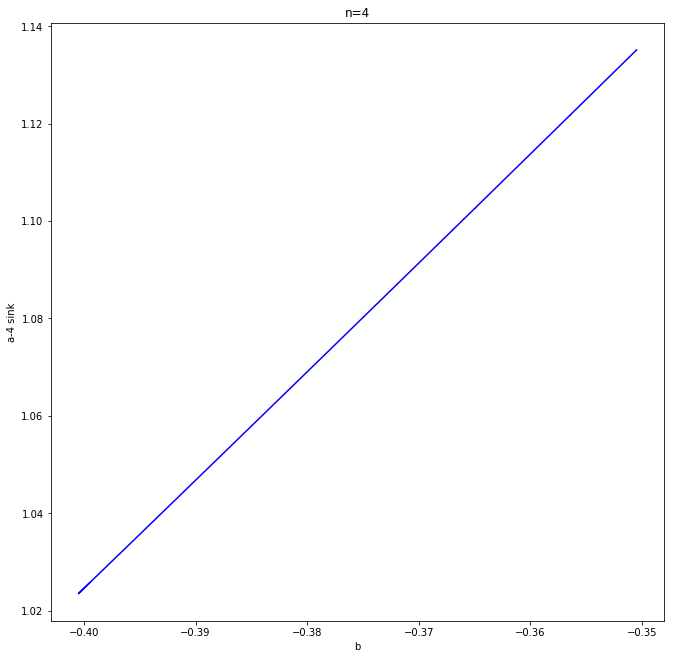

In [263]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('a-4 sink')
plt.title('n=4')
plt.plot(my_bS4, my_aS4, ',',color='red')
plt.plot(my_bS4, my_aS4, '-',color='blue')

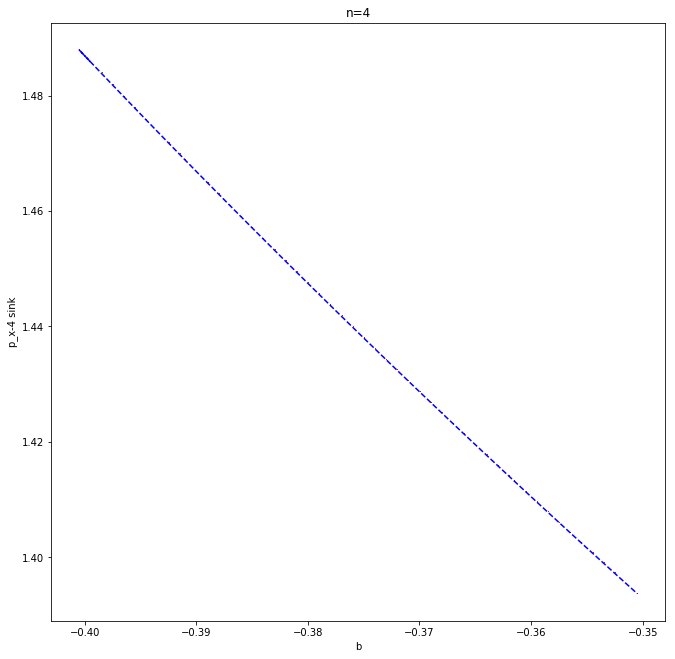

In [264]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('p_x-4 sink')
plt.title('n=4')
plt.plot(my_bS4, my_px4, ',',color='red')
plt.plot(my_bS4, my_px4, '--',color='blue')

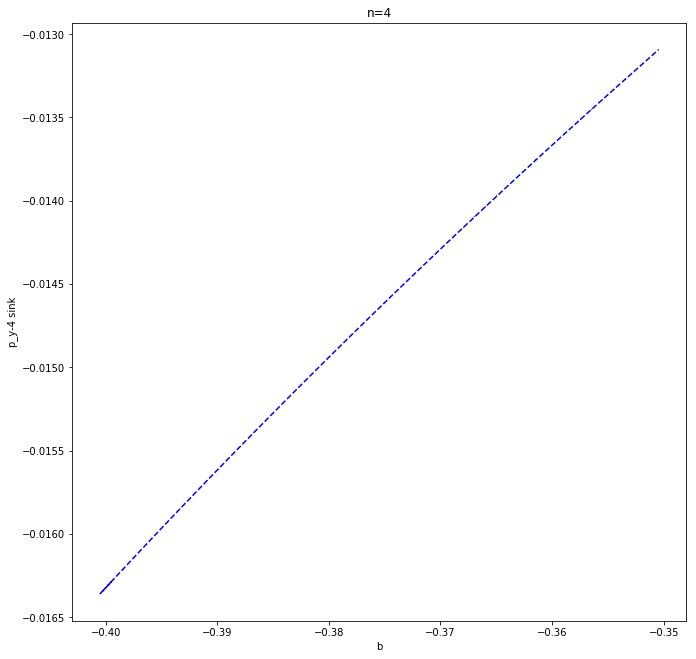

In [265]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('p_y-4 sink')
plt.title('n=4')
plt.plot(my_bS4, my_py4, ',',color='red')
plt.plot(my_bS4, my_py4, '--',color='blue')

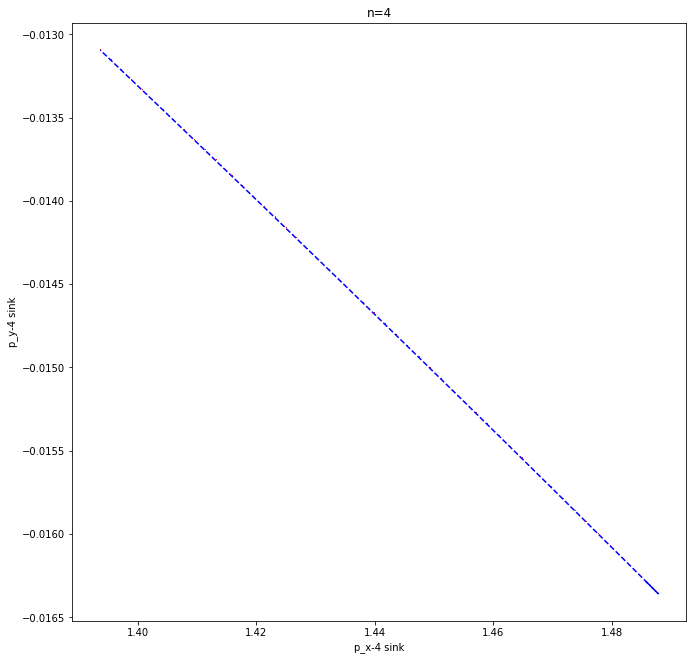

In [266]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('p_x-4 sink') 
plt.ylabel('p_y-4 sink')
plt.title('n=4')
plt.plot(my_px4, my_py4, ',',color='red')
plt.plot(my_px4, my_py4, '--',color='blue')

7.256886093980924e-12


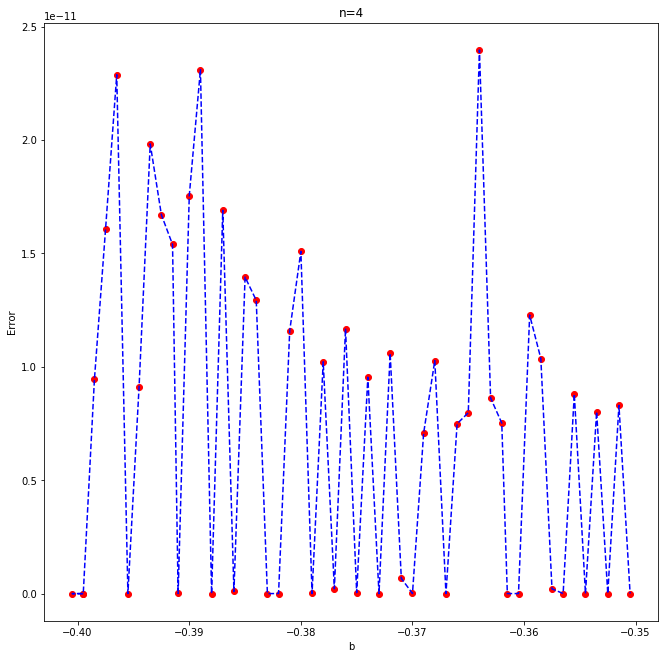

In [267]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('Error')
plt.title('n=4')
plt.plot(my_bS4, my_err4, 'o',color='red')
plt.plot(my_bS4, my_err4, '--',color='blue')

print(np.mean(my_err4))

1.455123267888212 -0.015206055344575923
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
1.4551232678812411 -0.01520605535546965
-0.7057175921372872 1.2707177277345938
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
1.4551232678812416 -0.015206055355473813
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
1.2707177277345938 -0.01592939768236573
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
1.4551232678812416 -0.015206055355473813
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146
0.5174492746067146 0.5174492746067146

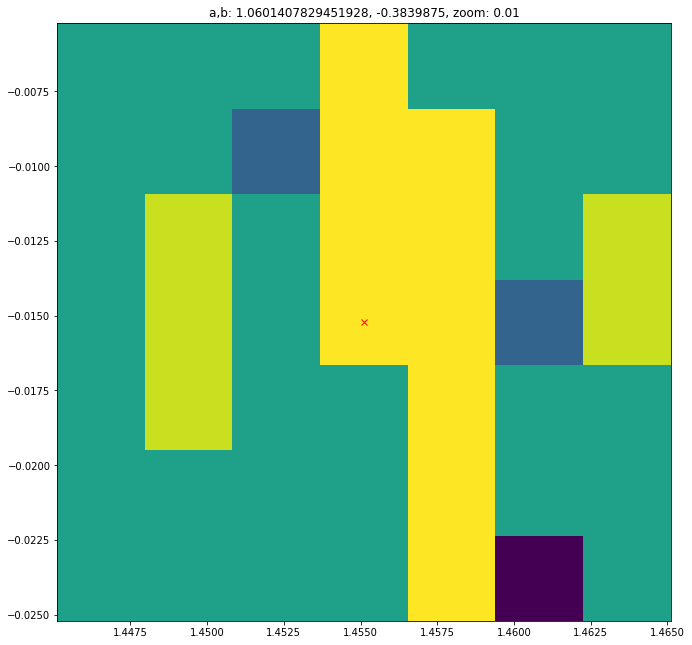

In [334]:
n=4
#answer x,y
a_val,b_val = 1.0601407829451928,-0.3839875
p_x,p_y = 1.455123267888212 ,  -0.015206055344575923

lim = 0.01
x_vals = np.linspace(p_x-lim,p_x+lim,8)
y_vals = np.linspace(p_y-lim,p_y+lim,8)

X_vals,Y_vals = np.meshgrid(x_vals, y_vals)

XY = NhMap_n(a_val,b_val,X_vals,Y_vals,n,50)
#X_vals = XY[0]
#Y_vals = XY[1]

fig = plt.figure(figsize = (11,11))

ax = fig.add_subplot(1, 1, 1)
plt.title('a,b: '+str(a_val)+', '+str( b_val)+', zoom: '+str(lim))
plt.pcolormesh(X_vals, Y_vals, XY[0])
plt.plot([p_x],[p_y],'x',color='red')

print(p_x,p_y)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        print(XY[0][i,j], XY[1][i,j])

In [348]:
#define our error function in R^5
n=3

def getTau_u(m,a,b,y_p,dx_p,dy_p,x_curr,y_curr):
    global n

    
    F = lambda u: m -  dx_p(a,b,u,x_curr,y_curr)/dy_p(a,b,u,x_curr,y_curr)
    #get u_guess by choosing u with current y value on parabolic curve.
    F_y = lambda u:y_curr - y_p(a,b,u,x_curr,y_curr)
    u_guess = optimize.fsolve(F_y, 0)
    
    u_new = optimize.fsolve(F, u_guess,xtol=0)
    
    #u_new = optimize.fsolve(F, 0) #?
    #print('u0, u1: ',u_guess, u_new)
    return u_new

pivX, pivY = symbols('pivX'),symbols('pivY')
a,b = symbols('a'),symbols('b')
u = symbols('u')
l_rX = pivX + u * dx
l_rY = pivY + u * dy
dx_perp = -dy
dy_perp = dx
#line of interest to be mapped
l_rXperp = pivX+ u*dx_perp
l_rYperp = pivY + u*dy_perp

linexi_p = l_rXperp
lineyi_p = l_rYperp

for i in range(n):
    oldlinex_p = linexi_p
    oldliney_p = lineyi_p


    newlinex_p = hMap(a,b,oldlinex_p, oldliney_p)
    newliney_p = oldlinex_p

    linexi_p = newlinex_p
    lineyi_p = newliney_p

pbola_x = linexi_p
pbola_y = lineyi_p

#find derivative of parabola expression
dx_p_sym = sym.diff(pbola_x,u)
dy_p_sym = sym.diff(pbola_y,u)

#lambdify the expressions for faster running time
x_p = sym.lambdify([a,b,u,pivX,pivY], pbola_x, "numpy")
y_p = sym.lambdify([a,b,u,pivX,pivY], pbola_y, "numpy")

dx_p = sym.lambdify([a,b,u,pivX,pivY], dx_p_sym, "numpy")
dy_p = sym.lambdify([a,b,u,pivX,pivY], dy_p_sym, "numpy")

u_piv = sym.solve(l_rYperp - pivY, u)


def F_sink(apdxdy):
    global b_val
    global n
    
    a_j,pivot_x,pivot_y,dx,dy = apdxdy[0],apdxdy[1],apdxdy[2],apdxdy[3],apdxdy[4]    
    
    #get u of pivot on perpindicular line
    u_piv = sym.solve(l_rYperp - pivot_y, u)
    
    #get u of tangency on parabolic manifold

    
    u_tau = getTau_u(dx/dy,a_j,b_val,y_p,dx_p,dy_p,pivot_x,pivot_y)

    x_tau, y_tau = x_p(a_j,b_val, u_tau,pivot_x,pivot_y), y_p(a_j,b_val, u_tau,pivot_x,pivot_y)
    #print(x_tau, ',',y_tau)
    DifftauX , DifftauY = deltatauX(x_tau,pivot_x),deltatauY(y_tau,pivot_y)
    xn, yn = NhMap_n(a_j,b_val,pivot_x,pivot_y,n,5)
    DiffpivX, DiffpivY = deltapivX(pivot_x,xn), deltapivY(pivot_y,yn)
    trDFn = getTraceDFn(a_j,b_val,pivot_x, pivot_y,n)
    return [.5*DifftauX, .5*DifftauY, 2*DiffpivX, 2*DiffpivY, 5*trDFn]
b_val = -0.4
print(F_sink([1,1.47182183680206, -0.016933543590010865,0.42842933, -8.56858654]))

b_val = -0.3998
print(F_sink([1,1.47182183680206, -0.016933543590010865,0.42842933, -8.56858654]))

[array([-0.09023658]), array([-0.03960759]), 1.9018037576689777, -1.1061082317418323, 79.59332116522694]
[array([-0.09028124]), array([-0.03957149]), 1.9021656317584517, -1.1063901706511694, 79.60625291316504]


In [463]:
#moving b_i, getting sink points

global b_val
global n


p0 = 1
p1 = 0

Total = 1000
b_i = np.zeros(Total)
b_i[p0] = -0.4
b_i[p1] = -0.3998

inc = 0.001



a_nsink = np.zeros(len(b_i))
px_nsink = np.zeros(len(b_i)) 
py_nsink = np.zeros(len(b_i))
dx_nsink = np.zeros(len(b_i))
dy_nsink = np.zeros(len(b_i))
p_errorn = np.zeros(len(b_i))


a_nsink[p0]  = 1.0501345175490413 
px_nsink[p0] = 1.281954253015683 
py_nsink[p0] = -0.04116125744546116 
dx_nsink[p0] =  0.9261589363607461
dy_nsink[p0] = -5.858733212314022




a_nsink[p1]  =  1.0503406220602773 
px_nsink[p1] =  1.28185542073439 
py_nsink[p1] = -0.04111626990300139 
dx_nsink[p1] = 2.588258032355818 
dy_nsink[p1] = -16.383906407999536

direction = 1
for i in range(2,Total):
    global b_val
    global n
    
    n=3
    j=0
    
    cont = True
    flag = False
    
    b_inc = inc
    
    while(cont):
        try:
            
            print('i, j: ',i, j)
    
 
        
            b_i[i] = b_i[i-1] + direction * b_inc
            b_val = b_i[i]

            slope_a = np.double((a_nsink[i-1] - a_nsink[i-2]) / (b_i[i-1] - b_i[i-2]))
            slope_px = np.double((px_nsink[i-1] - px_nsink[i-2]) / (b_i[i-1] - b_i[i-2]))
            slope_py = np.double((py_nsink[i-1] - py_nsink[i-2]) / (b_i[i-1] - b_i[i-2]))


            step = 1

            a_guess = a_nsink[i-1] + step*slope_a*(b_i[i] - b_i[i-1])
            px_guess = px_nsink[i-1] + step*slope_px*(b_i[i] - b_i[i-1])
            py_guess = py_nsink[i-1] + step*slope_py*(b_i[i] - b_i[i-1])    

            #normalize dx,dy
            dx_i = dx_nsink[i-1] / np.sqrt(dx_nsink[i-1]**2 + dy_nsink[i-1]**2)
            dy_i = dy_nsink[i-1] / np.sqrt(dx_nsink[i-1]**2 + dy_nsink[i-1]**2)


            print('b,a guess:',b_val, a_guess)
            
            sinkn_i = optimize.fsolve(F_sink,[a_guess,px_guess,py_guess,dx_i,dy_i],xtol = 0.0001)#dx_nsink[i-1],dy_nsink[i-1]

            better_p = NhMap_n(sinkn_i[0],b_val,sinkn_i[1],sinkn_i[2],n,100)

            sinkn_i = optimize.fsolve(F_sink,[sinkn_i[0],better_p[0],better_p[1],dx_i,dy_i],xtol=.0001)#xtol = 0,epsfcn = 1
            

            
            if np.max(np.abs(F_sink(sinkn_i))) > 0.001:
                raise NoConvergence

            a_nsink[i]  = sinkn_i[0]
            px_nsink[i] = sinkn_i[1]
            py_nsink[i] = sinkn_i[2]
            dx_nsink[i] = sinkn_i[3]
            dy_nsink[i] = sinkn_i[4]

            #calculate relative error
        #     print(np.abs((a_guess - a_5sink[i])) / a_5sink[i])
        #     print(np.abs((better_p[0] - px_tsink[i])) / px_4sink[i])
        #     print(np.abs((better_p[1] - py_4sink[i])) / py_4sink[i])

            print('...')
            p_i = sinkn_i[1],sinkn_i[2]
            p_Fin = NhMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n,10000)

            p_errorn[i] = np.sqrt((p_i[0] - p_Fin[0])**2 + (p_i[1]-p_Fin[1])**2)


            print('b: ',b_val)
            print('a: ',a_nsink[i])
            print('dx: ',dx_nsink[i])
            print('dy: ',dy_nsink[i])

            print('p: ',px_nsink[i],', ',py_nsink[i])
            print('n*p: ',hMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n))
            print('n*1,000p: ',NhMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n,1000))
            true_p = NhMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n,1000)
            print('^Trace DF4: ',getTraceDFn(a_nsink[i],b_val,true_p[0],true_p[1],n))
            print('p-F Error: ',F_sink(sinkn_i))
            print('1,000 5p-Error: ',F_sink([sinkn_i[0], true_p[0],true_p[1],sinkn_i[3],sinkn_i[4]]))
            print('p sink diff error: ',p_errorn[i])
            print('--------------------------------------------')
            
            cont = False
            
            if b_val > -0.35:
                
                raise KeyboardInterrupt
                
        except KeyboardInterrupt: 
            print('Interruption Found. Goodbye. ')
            cont = False
            flag = True
            break
        except np.linalg.LinAlgError:
            j+=1

            raise NoConvergence
        except NoConvergence: #

            j+=1
            b_inc = b_inc*0.5
            
            
                
                
                
            if j>50:
                print(b_vals[i-1])
                cont = False
                flag = True
                break
                
        
    if(flag):
        print('NO CONVERGENCE DETECTED')
        r = i-1
        break

i, j:  2 0
b,a guess: -0.399 1.0511650401052213
...
b:  -0.399
a:  1.0511665214639558
dx:  8190.728994917337
dy:  -51813.24733138298
p:  1.2814592957019508 ,  -0.040936638780885964
n*p:  [1.2814592962222675, -0.04093664641170913]
n*1,000p:  [1.2814592957085074, -0.04093664358198956]
^Trace DF4:  -1.6380933276494147e-09
p-F Error:  [array([-1.82781233e-05]), array([0.00011582]), -1.5423218258092675e-11, 9.6078946465461e-09, 3.577204471527651e-07]
1,000 5p-Error:  [array([-1.82781583e-05]), array([0.00011582]), 0.0, 0.0, -8.190466638247074e-09]
p sink diff error:  4.80110807491619e-09
--------------------------------------------
i, j:  3 0
b,a guess: -0.398 1.0521985253788704
...
b:  -0.398
a:  1.0521992172759767
dx:  -19627847.57629773
dy:  124162638.44964772
p:  1.2809618310357982 ,  -0.04069396284480857
n*p:  [1.280962820148669, -0.040712853612135724]
n*1,000p:  [1.2809613623115774, -0.04070450598429498]
^Trace DF4:  -0.00021566872562550632
p-F Error:  [array([-3.59422387e-05]), array

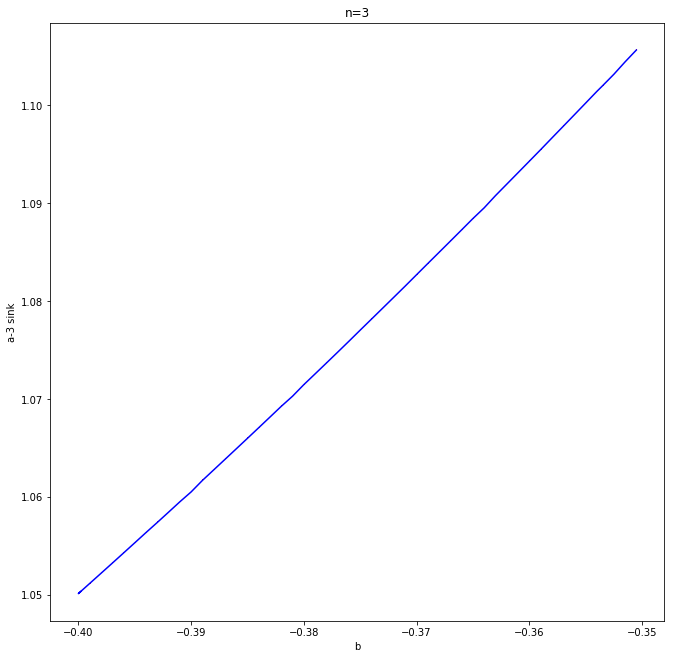

In [374]:
l = 52

my_bS3, my_aS3 = np.zeros(l),np.zeros(l)
my_px3, my_py3 = np.zeros(l),np.zeros(l)
my_err3 = np.zeros(l)

for i in range(l):
    my_bS3[i] = b_i[i]
    my_aS3[i] = a_nsink[i]
    my_px3[i] = px_nsink[i]
    my_py3[i] = py_nsink[i]
    my_err3[i] = p_errorn[i]

fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('a-3 sink')
plt.title('n=3')
plt.plot(my_bS3, my_aS3, ',',color='red')
plt.plot(my_bS3, my_aS3, '-',color='blue')


In [464]:
global b_val
global n

b_val = -0.4
n=3
sinkn_i = optimize.fsolve(F_sink,[1.0501345175490413, 1.281954253015683, -0.04116125744546116, 0.9261589363607461, -5.858733212314022],xtol = 0.001,epsfcn = 1)
print(sinkn_i[0],sinkn_i[1],sinkn_i[2],sinkn_i[3],sinkn_i[4])
print(F_sink(sinkn_i))
print(NhMap_n(sinkn_i[0],b_val,sinkn_i[1],sinkn_i[2],n,50))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in double_scalars


1.0501345175490413 1.281954253015683 -0.04116125744546116 0.9261589363607461 -5.858733212314022
[array([1.11022302e-16]), array([-3.40005801e-16]), 4.440892098500626e-16, -1.5265566588595902e-15, 2.55351295663786e-14]
[1.2819542530156829, -0.041161257445460175]


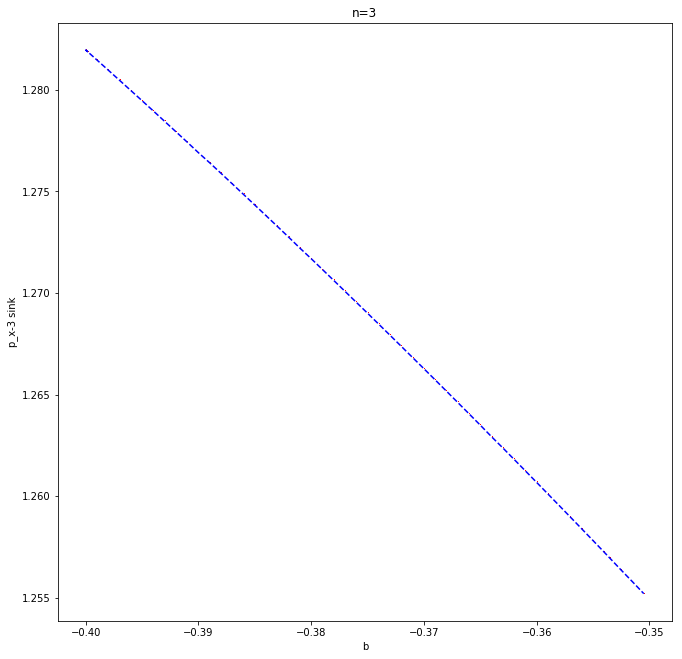

In [376]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('p_x-3 sink')
plt.title('n=3')
plt.plot(my_bS3, my_px3, ',',color='red')
plt.plot(my_bS3, my_px3, '--',color='blue')

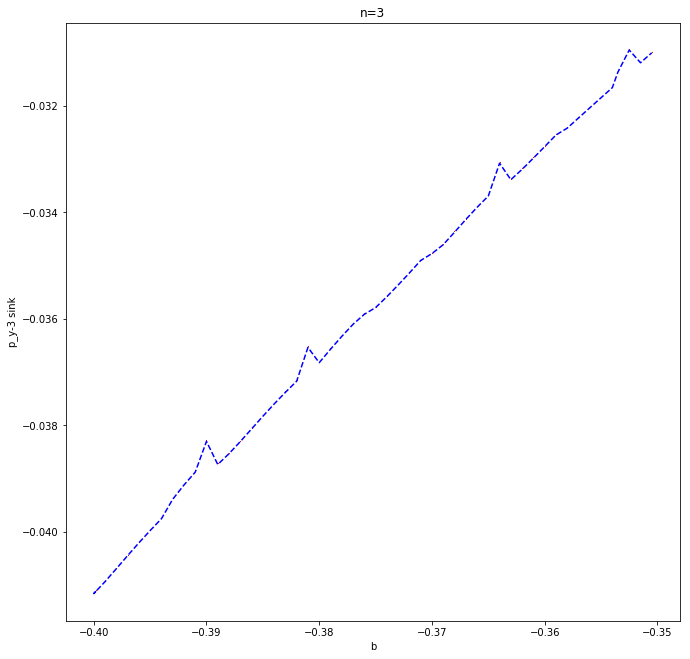

In [377]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('p_y-3 sink')
plt.title('n=3')
plt.plot(my_bS3, my_py3, ',',color='red')
plt.plot(my_bS3, my_py3, '--',color='blue')

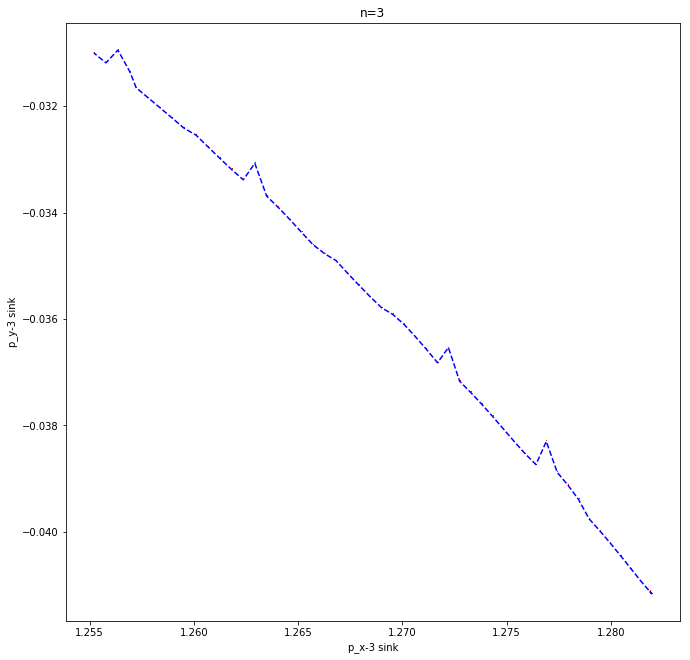

In [378]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('p_x-3 sink') 
plt.ylabel('p_y-3 sink')
plt.title('n=3')
plt.plot(my_px3, my_py3, ',',color='red')
plt.plot(my_px3, my_py3, '--',color='blue')

7.256886093980924e-12


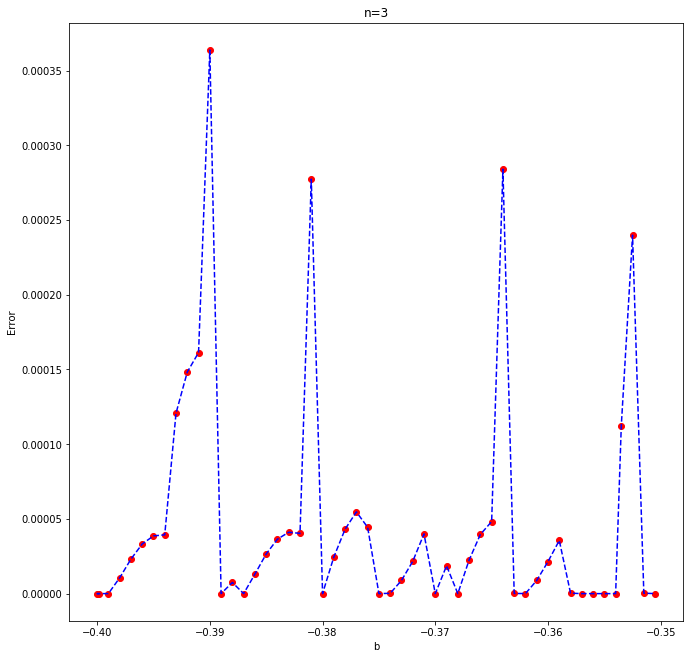

In [379]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('Error')
plt.title('n=3')
plt.plot(my_bS3, my_err3, 'o',color='red')
plt.plot(my_bS3, my_err3, '--',color='blue')

print(np.mean(my_err3))

In [419]:
print(NhMap_n(a_val,b_val,1.281954253015683, -0.04116125744546116,2,1))

[-0.04116125744546051, -0.7093336062303435]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


1.281954253015683 -0.04116125744546116


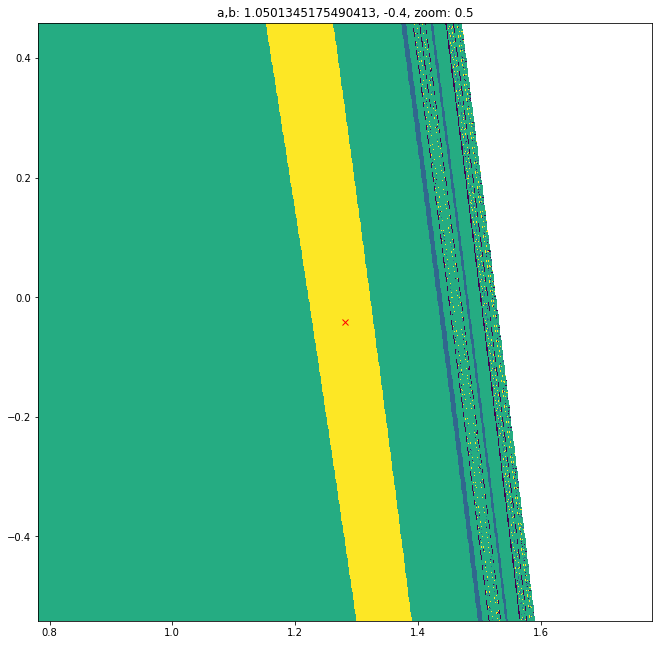

In [527]:
n=3

#answer x,y
a_val,b_val = 1.0501345175490413,-0.4
p_x,p_y =  1.281954253015683, -0.04116125744546116

lim = 0.5
x_vals = np.linspace(p_x-lim,p_x+lim,50)
y_vals = np.linspace(p_y-lim,p_y+lim,50)

X_vals,Y_vals = np.meshgrid(x_vals, y_vals)

XY = NhMap_n(a_val,b_val,X_vals,Y_vals,n,50)
#X_vals = XY[0]
#Y_vals = XY[1]

fig = plt.figure(figsize = (11,11))

ax = fig.add_subplot(1, 1, 1)
plt.title('a,b: '+str(a_val)+', '+str( b_val)+', zoom: '+str(lim))
plt.pcolormesh(X_vals, Y_vals, XY[0])
plt.plot([p_x],[p_y],'x',color='red')
#plt.plot([-0.7093336062303435], [1.281954253015683],'x',color='red')
#plt.plot([-0.0411612574454605], [-0.7093336062303435],'x',color='red')

print(p_x,p_y)
# for i in range(len(x_vals)):
#     for j in range(len(y_vals)):

#         print(XY[0][j,i], XY[1][j,i])


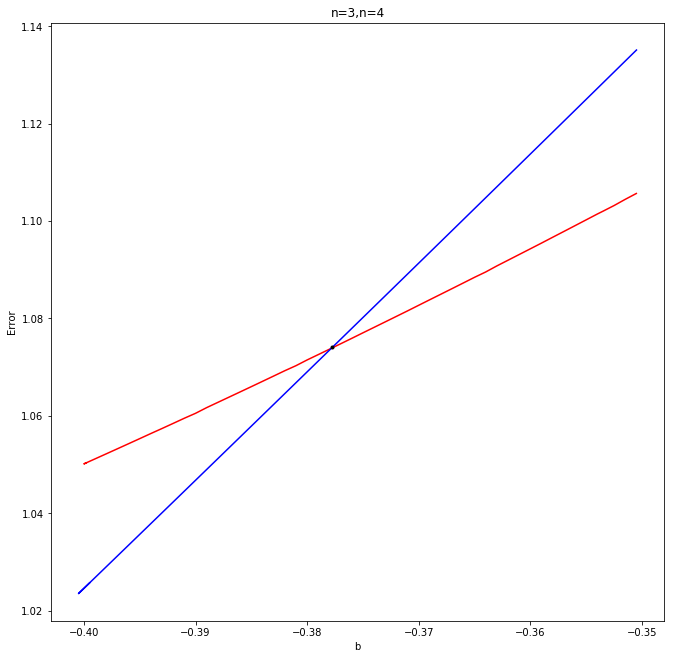

In [472]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.xlabel('b') 
plt.ylabel('Error')
plt.title('n=3,n=4')
plt.plot(my_bS3, my_aS3, '-',color='red')
plt.plot(my_bS4, my_aS4, '-',color='blue')

plt.plot([-0.3778],[1.0742],'.',color='black')

In [402]:
diff_arr = np.ones(100)
for i in range(52):
    print(i)
    diff_arr[i] = my_aS3[i] - 1.0735
    print(diff_arr[i])
    print('---')
print(diff_arr)

0
-0.02315937793972256
---
1
-0.023365482450958597
---
2
-0.02233347853604406
---
3
-0.02130078272402325
---
4
-0.020264974735432206
---
5
-0.019224758925552754
---
6
-0.018179482197892893
---
7
-0.01712913921027792
---
8
-0.016098203218356755
---
9
-0.015048121520515156
---
10
-0.013990189493964023
---
11
-0.012982024240208334
---
12
-0.011809789214301869
---
13
-0.010735239611072034
---
14
-0.00966059023457344
---
15
-0.008584118552832143
---
16
-0.0075040988400296715
---
17
-0.006419381899577692
---
18
-0.0053294151180884874
---
19
-0.0042342105936421515
---
20
-0.0032023217629231215
---
21
-0.0020218717068838377
---
22
-0.0009227228861514725
---
23
0.0001817880048304854
---
24
0.0012919413445502403
---
25
0.002412079975415038
---
26
0.0035454015881775103
---
27
0.004669928497895048
---
28
0.005795754277397869
---
29
0.00692412530485309
---
30
0.008054635600657889
---
31
0.009205173767618424
---
32
0.010353513303871242
---
33
0.011494977627176883
---
34
0.012639274809211676
---
35
0

In [484]:
# print(my_bS4[24],my_aS4[24])
# print(my_px4[24],my_py4[24])
# print('-------------------')
# print(my_bS3[23],my_aS3[23])
# print(my_px3[23],my_py3[23])

print(NhMap_n( 1.0742,-0.3778,1.270596202587732, -0.037155043209825656 ,2,1))

[-0.037155043209825656, -0.7201671061899458]


In [9]:

#answer x,y
a_val,b_val = 1.0742,-0.3778
# n=4
# p_x,p_y =  1.443697659739855, -0.01875471416488833
px_vals4 = [ 1.443697659739855,-1.2318297113360237,-1.175424822859489,-0.018754714004725614]
py_vals4 = [-0.01875471416488833,1.443697659739855, -1.2318297113360237, -1.175424822859489]

n=3
p_x,p_y = 1.270596202587732, -0.037155043209825656
px_vals3 = [1.270596202587732,-0.7201671061899458,-0.037155043209825656]
py_vals3 = [-0.037155043209825656,1.270596202587732,-0.7201671061899458]

lim = 3.5
x_vals = np.linspace(1.5-lim,1.5+lim,15000)
y_vals = np.linspace(0-lim,0+lim,15000)

X_vals,Y_vals = np.meshgrid(x_vals, y_vals)

#X_per,Y_per =  np.meshgrid(x_vals, y_vals)

XY = NhMap_n(a_val,b_val,X_vals,Y_vals,n,50)
#X_vals = XY[0]
#Y_vals = XY[1]

fig = plt.figure(figsize = (14,14))

ax = fig.add_subplot(1, 1, 1)
plt.title('a,b: '+str(a_val)+', '+str( b_val)+', zoom: '+str(lim)+'; N: '+str(n))
#plt.pcolormesh(X_vals, Y_vals, XY[0])
plt.plot(px_vals3,py_vals3,'o',color='red')
plt.plot(px_vals4,py_vals4,'o',color='blue')

for i in range(len(X_per)):
    for j in range(len(Y_per)):
        X_per[j,i] = 0
        
for i in range(len(X_per)):
    for j in range(len(Y_per)):
        flag = False
        if  NhMap_n(a_val,b_val, XY[0][j,i], XY[1][j,i],n,1)[0]-0.01 <= XY[0][j,i] <= NhMap_n(a_val,b_val, XY[0][j,i], XY[1][j,i],n,1)[0]+0.01:
            flag=True
        for k in range(1,n):
            if NhMap_n(a_val,b_val, XY[0][j,i], XY[1][j,i],k,1)[0]-0.01 <= XY[0][j,i] <= NhMap_n(a_val,b_val, XY[0][j,i], XY[1][j,i],k,1)[0]+0.01:
                
                flag = False   
        if flag == True:
            if n == 4:
                X_per[j,i] = 40
            if n == 3:
                X_per[j,i] = -30
#         else:
#             if n == 4:
#                 X_per[j,i] = 0
#             if n == 3:
#                 X_per[j,i] = 0
plt.pcolormesh(X_vals, Y_vals, X_per)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


1.7329 -0.04325
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [0.52057765 0.52057765 0.52057765 ...        nan        nan        nan]
 [0.52057765 0.52057765 0.52057765 ...        nan        nan        nan]
 [0.52057765 0.52057765 0.52057765 ...        nan        nan        nan]]


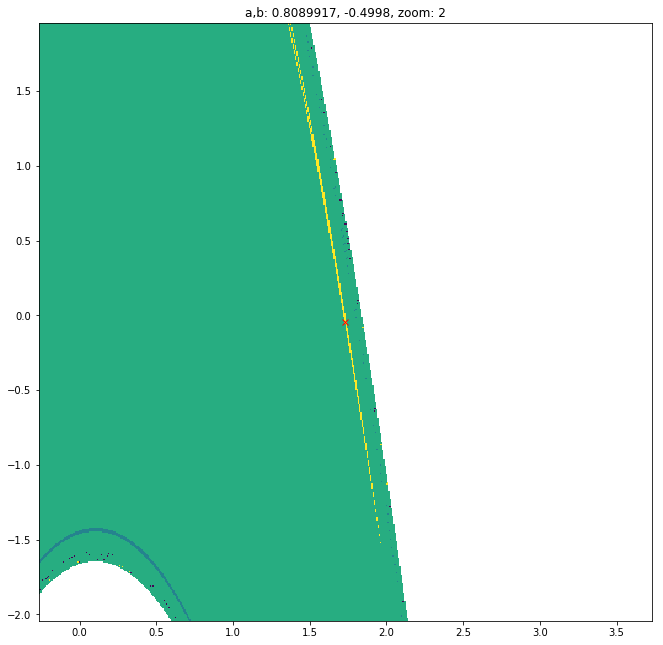

In [457]:
n=4

#answer x,y
a_val,b_val = 0.8089917,-0.4998
p_x,p_y =  1.7329, -0.04325
lim = 2
x_vals = np.linspace(p_x-lim,p_x+lim,500)
y_vals = np.linspace(p_y-lim,p_y+lim,500)

X_vals,Y_vals = np.meshgrid(x_vals, y_vals)

XY = NhMap_n(a_val,b_val,X_vals,Y_vals,n,50)
#X_vals = XY[0]
#Y_vals = XY[1]

fig = plt.figure(figsize = (11,11))

ax = fig.add_subplot(1, 1, 1)
plt.title('a,b: '+str(a_val)+', '+str( b_val)+', zoom: '+str(lim))
plt.pcolormesh(X_vals, Y_vals, XY[0])
plt.plot([p_x],[p_y],'x',color='red')
#plt.plot([-0.7093336062303435], [1.281954253015683],'x',color='red')
#plt.plot([-0.0411612574454605], [-0.7093336062303435],'x',color='red')

print(p_x,p_y)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        w = 1
        #print(XY[0][i,j], XY[1][i,j])


In [22]:
b_val = -0.4
a_tan = 1.0794520443182858
tan_x,tan_y = 1.4985050280406014, -0.01692932242739087

n = 4

a_guess = a_tan - 2/(get_eig(b_val,a_tan)[0]**n)
density = 500
x_sweep, y_sweep = np.linspace(tan_x - 0.5, tan_x + 0.5,density ), np.linspace(tan_y - 0.5, tan_y + 0.5,density )
X_vals,Y_vals = np.meshgrid(x_sweep, y_sweep)
XY = NhMap_n(a_guess,b_val,X_vals,Y_vals,n,50)

x_check, y_check = np.zeros(density),np.zeros(density)

min_i,min_j = 1,1
curr_min = 100


for i in range(density):
    for j in range(density):
        
        
        dist_ij = np.sqrt((tan_x - XY[0][j,i])**2 + (tan_y - XY[1][j,i])**2)
        if dist_ij <= curr_min:
            min_i = i
            min_j = j
            curr_min = dist_ij
# print(tan_x,tan_y)
# print(x_sweep[min_i],y_sweep[min_j])
# print(XY[0][min_j,min_i],XY[1][min_j,min_i])

            
# print(a_guess)

x_0,y_0 = XY[0][min_j,min_i],XY[1][min_j,min_i]
print(x_0,y_0)
density = 200
def F_sweepTr(a_0):
    global x_0,y_0
    global b_val
    x_sweep, y_sweep = np.linspace(x_0 - 0.5, x_0 + 0.5,density ), np.linspace(y_0 - 0.5, y_0 + 0.5,density)
    X_vals,Y_vals = np.meshgrid(x_sweep, y_sweep)
    XY = NhMap_n(a_0,b_val,X_vals,Y_vals,n,50)
    
    min_i,min_j = 1,1
    curr_min = 100


    for i in range(density):
        for j in range(density):


            dist_ij = np.sqrt((x_0 - XY[0][j,i])**2 + (y_0 - XY[1][j,i])**2)
            if dist_ij <= curr_min:
                min_i = i
                min_j = j
                curr_min = dist_ij
    x_0,y_0 = XY[0][min_j,min_i],XY[1][min_j,min_i]
    
    trDFn = getTraceDFn(a_0,b_val,x_0,y_0,n)
#     print(x_0,y_0)
#     print(trDFn)
    return trDFn

F_sweepTr(a_guess) #a_guess
a_sink = optimize.newton(F_sweepTr,a_guess,tol=1e-15)
print(a_sink)
print([x_0,y_0])
print(NhMap_n(a_sink,b_val,x_0,y_0,n,1))
print(F_sweepTr(a_sink))
print('-------')
for i in range(n+1):
    print(NhMap_n(a_sink,b_val,x_0,y_0,i,1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


1.2845909466527006 -0.08576901212752042
1.053949515112779
[1.28302371202882, -0.05121849340484186]
[-0.7144714342408935, 1.2830237120288202]
-7.605027718682322e-15
-------
[1.28302371202882, -0.051218493404842746]
[-0.7144714342408931, 1.28302371202882]
[-0.05121849340484286, -0.7144714342408931]
[1.28302371202882, -0.05121849340484286]
[-0.714471434240893, 1.28302371202882]


In [18]:

x_0,y_0 = 1.2845909466527006, -0.08576901212752042
for i in range(10):
    print(NhMap_n(a_tan,b_val,x_0,y_0,i,1))

[1.2845909466527006, -0.08576901212752042]
[-0.7469759852243966, 1.2845909466527006]
[-0.1161416064204761, -0.7469759852243966]
[1.2842298028329344, -0.1161416064204761]
[-0.7338255250164429, 1.2842298028329344]
[-0.09497674031163827, -0.7338255250164429]
[1.2837929251890559, -0.09497674031163827]
[-0.7410804215615264, 1.2837929251890559]
[-0.10635243922999837, -0.7410804215615264]
[1.2842226578277982, -0.10635243922999837]


In [10]:
#moving b_i, getting sink points
#starting from scratch with just info of b, a_tan, x_tan,y_tan!
# global b_val

global x_0, y_0

Total = 1000
b_i = np.zeros(Total)
b_i[0] = -0.4


b_val = b_i[0]
a_tan = 1.0794520443182858

tan_x,tan_y = 1.4985050280406014, -0.01692932242739087

n = 4

a_guess = a_tan - 2/(get_eig(b_val,a_tan)[0]**n)

density = 500
x_sweep, y_sweep = np.linspace(tan_x - 0.5, tan_x + 0.5,density), np.linspace(tan_y - 0.5, tan_y + 0.5,density )
X_vals,Y_vals = np.meshgrid(x_sweep, y_sweep)

XY = NhMap_n(a_guess,b_val,X_vals,Y_vals,n,500)

x_check, y_check = np.zeros(density),np.zeros(density)

min_i,min_j = 1,1
curr_min = 100


for i in range(density):
    for j in range(density):
        
        
        dist_ij = np.sqrt((tan_x - XY[0][j,i])**2 + (tan_y - XY[1][j,i])**2)
        if dist_ij <= curr_min:
            min_i = i
            min_j = j
            curr_min = dist_ij
# print(tan_x,tan_y)
# print(x_sweep[min_i],y_sweep[min_j])
# print(XY[0][min_j,min_i],XY[1][min_j,min_i])

            
# print(a_guess)

x_0,y_0 = XY[0][min_j,min_i],XY[1][min_j,min_i]
print(x_0,y_0)
density = 100

def F_sweepTrPara(a_0,b_val,n,density):
    global x_0,y_0
    
    lim = 0.6
    x_sweep, y_sweep = np.linspace(x_0-lim, x_0+lim,density ), np.linspace(y_0-lim, y_0+lim,density)
    X_vals,Y_vals = np.meshgrid(x_sweep, y_sweep)
    XY = NhMap_n(a_0,b_val,X_vals,Y_vals,n,500)
    
    min_i,min_j = 1,1
    curr_min = 200

    
    
    for i in range(density):
        for j in range(density):

            for k in range(1,n):
                if NhMap_n(a_0,b_val, XY[0][j,i], XY[1][j,i],k,1)[0]-0.01 <= XY[0][j,i] <= NhMap_n(a_0,b_val, XY[0][j,i], XY[1][j,i],k,1)[0]+0.01:
                    w=1
                    #XY[0][j,i],XY[1][j,i] = 0,0
                    
            dist_ij = np.sqrt((x_0 - XY[0][j,i])**2 + (y_0 - XY[1][j,i])**2)
            if dist_ij <= curr_min:
                min_i = i
                min_j = j
                curr_min = dist_ij
    x_0,y_0 = XY[0][min_j,min_i],XY[1][min_j,min_i]
    
    trDFn = getTraceDFn(a_0,b_val,x_0,y_0,n)
#     print(x_0,y_0)
#     print(trDFn)
    return trDFn
F_sweepTr = lambda a: F_sweepTrPara(a,b_val,n,density)
F_sweepTr(a_guess) 
density = 500
a_sink = optimize.newton(F_sweepTr,a_guess)
print('a: ',a_sink)
print('x,y: ',[x_0,y_0])
print('n* x,y: ',NhMap_n(a_sink,b_val,x_0,y_0,n,1000))
print('Err: ',F_sweepTr(a_sink))


a_nsink = np.zeros(len(b_i))
px_nsink = np.zeros(len(b_i)) 
py_nsink = np.zeros(len(b_i))
p_errorn = np.zeros(len(b_i))

a_nsink[0] = a_sink
px_nsink[0] = x_0
py_nsink[0] = y_0







inc = 0.001




 


density = 100
direction = 1
for i in range(1,Total):
    
    j=0
    
    cont = True
    flag = False
    
    b_inc = inc
    
    while(cont):
        try:
            
            
            print('i, j: ',i, j)
    
 
        
            b_i[i] = b_i[i-1] + direction * b_inc
            b_val = b_i[i]



            step = 1

            a_guess = a_nsink[i-1]
            print('b,a guess:',b_val, a_guess)
            
            F_sweepTr = lambda a: F_sweepTrPara(a,b_val,n,density)
            sinkn_i = optimize.newton(F_sweepTr,a_guess)
            



            a_nsink[i]  = sinkn_i
            px_nsink[i] = x_0
            py_nsink[i] = y_0

            #calculate relative error
        #     print(np.abs((a_guess - a_5sink[i])) / a_5sink[i])
        #     print(np.abs((better_p[0] - px_tsink[i])) / px_4sink[i])
        #     print(np.abs((better_p[1] - py_4sink[i])) / py_4sink[i])

            print('...')
            p_i = x_0,y_0
            p_Fin = NhMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n,10000)

            p_errorn[i] = np.sqrt((p_i[0] - p_Fin[0])**2 + (p_i[1]-p_Fin[1])**2)


            print('b: ',b_val)
            print('a: ',a_nsink[i])

            print('p: ',px_nsink[i],', ',py_nsink[i])
            print('n*p: ',hMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n))
            print('n*1,000p: ',NhMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n,1000))
            true_p = NhMap_n(a_nsink[i],b_val,px_nsink[i],py_nsink[i],n,1000)
            print('^Trace DFn: ',getTraceDFn(a_nsink[i],b_val,true_p[0],true_p[1],n))
            print('p-F Error: ',F_sweepTr(a_nsink[i]))
            
            print('p sink diff error: ',p_errorn[i])
            print('--------------------------------------------')
            
            cont = False
            
            if b_val > -0.35:
                
                raise KeyboardInterrupt
                
        except KeyboardInterrupt: 
            print('Interruption Found. Goodbye. ')
            cont = False
            flag = True
            break
        except np.linalg.LinAlgError:
            j+=1

            raise NoConvergence
        except NoConvergence: #

            j+=1
            b_inc = b_inc*0.5
            
            
                
                
                
            if j>50:
                print(b_vals[i-1])
                cont = False
                flag = True
                break
                
        
    if(flag):
        print('NO CONVERGENCE DETECTED')
        r = i-1
        break

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


1.2845909466527006 -0.08576901212752042


NameError: name 'getTraceDFn' is not defined

In [666]:
a_val,b_val = 1.023495303733682,-0.4
x_0,y_0 = 1.2844709092873423, -0.09375579670052736
#x_0,y_0 = 1.2819542530156829, -0.041161257445460175

for i in range(10):
    print(NhMap_n(a_val,b_val,x_0,y_0,i,1))
print(NhMap_n(a_val,b_val,x_0,y_0,3,1))

[1.2844709092873423, -0.09375579670052736]
[-0.6511272895623134, 1.2844709092873423]
[0.05228366157355324, -0.6511272895623134]
[1.257653108235226, 0.05228366157355324]
[-0.6397671237447404, 1.257653108235226]
[0.07802010991568098, -0.6397671237447404]
[1.2496766928010057, 0.07802010991568098]
[-0.6295923045340169, 1.2496766928010057]
[0.09442963244425234, -0.6295923045340169]
[1.2427104597525842, 0.09442963244425234]
[-0.6183856254138611, 1.2427104597525842]
[0.11153041186600077, -0.6183856254138611]
[1.2346229585414368, 0.11153041186600077]
[-0.6047197614834493, 1.2346229585414368]
[0.1318729232503008, -0.6047197614834493]
[1.224088842381734, 0.1318729232503008]
[-0.5863478735986978, 1.224088842381734]
[0.15848285878940122, -0.5863478735986978]
[1.2088322056762209, 0.15848285878940122]
[-0.5590015520425987, 1.2088322056762209]
[0.19664250576874992, -0.5590015520425987]
[1.1840238228742817, 0.19664250576874992]
[-0.5135077733959266, 1.1840238228742817]
[0.25650475538836237, -0.5135077

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


1.4878898764973796 -0.016358519168480634


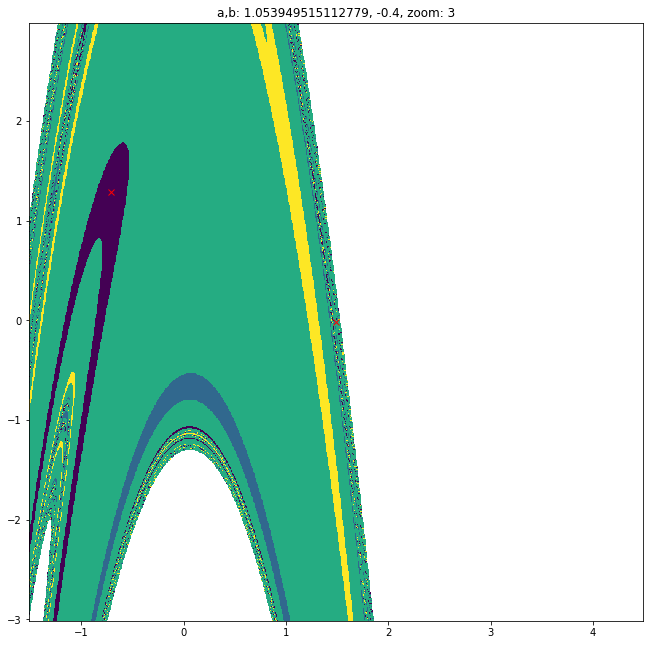

In [654]:
n=3

#answer x,y
a_val,b_val =1.0742,-0.4
p_x,p_y =  x_0,y_0
#p_x3 = [1.2819542530156829,-0.7093336062303435,-0.0411612574454604]
#p_y3 = [-0.041161257445460175,1.2819542530156829,-0.7093336062303435]

lim = 3
x_vals = np.linspace(p_x-lim,p_x+lim,1000)
y_vals = np.linspace(p_y-lim,p_y+lim,1000)

X_vals,Y_vals = np.meshgrid(x_vals, y_vals)

XY = NhMap_n(a_val,b_val,X_vals,Y_vals,n,50)
#X_vals = XY[0]
#Y_vals = XY[1]

fig = plt.figure(figsize = (11,11))

ax = fig.add_subplot(1, 1, 1)
plt.title('a,b: '+str(a_val)+', '+str( b_val)+', zoom: '+str(lim))
plt.pcolormesh(X_vals, Y_vals, XY[0])
plt.plot([p_x],[p_y],'x',color='red')
plt.plot([-0.71491677792818], [1.2825170413993467],'x',color='red')

print(p_x,p_y)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        w = 1
        #print(XY[0][i,j], XY[1][i,j])



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


1.2814592957019508 -0.040936638780885964


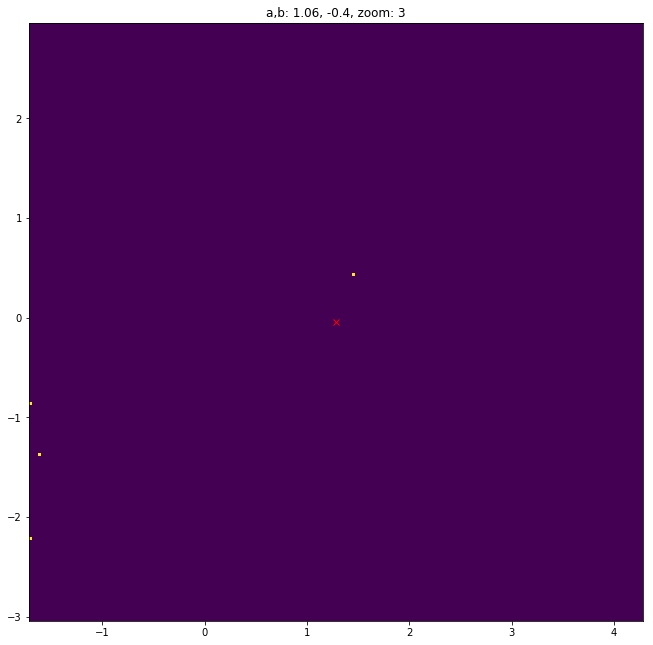

In [697]:
n=5
    
a_val,b_val = 1.06,-0.4
p_x,p_y =  1.2814592957019508 ,  -0.040936638780885964

#p_x3 = [1.2819542530156829,-0.7093336062303435,-0.0411612574454604]
#p_y3 = [-0.041161257445460175,1.2819542530156829,-0.7093336062303435]

lim = 3
x_vals = np.linspace(p_x-lim,p_x+lim,200)
y_vals = np.linspace(p_y-lim,p_y+lim,200)

X_vals,Y_vals = np.meshgrid(x_vals, y_vals)
Per_vals, dum = np.meshgrid(x_vals, y_vals)

XY = NhMap_n(a_val,b_val,X_vals,Y_vals,n,300)

#X_vals = XY[0]
#Y_vals = XY[1]

fig = plt.figure(figsize = (11,11))

ax = fig.add_subplot(1, 1, 1)
plt.title('a,b: '+str(a_val)+', '+str( b_val)+', zoom: '+str(lim))
#plt.pcolormesh(X_vals, Y_vals, XY[0])
plt.plot([p_x],[p_y],'x',color='red')
#plt.plot([-0.71491677792818], [1.2825170413993467],'x',color='red')

print(p_x,p_y)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        #print( XY[0][j,i],XY[1][j,i])
        flag = False

        if  NhMap_n(a_val,b_val, XY[0][j,i], XY[1][j,i],n,1)[0]-0.01 <= XY[0][j,i] <= NhMap_n(a_val,b_val, XY[0][j,i], XY[1][j,i],n,1)[0]+0.01:
            flag = True
        for k in range(1,n):
            if NhMap_n(a_val,b_val, XY[0][j,i], XY[1][j,i],k,1)[0]-0.01 <= XY[0][j,i] <= NhMap_n(a_val,b_val, XY[0][j,i], XY[1][j,i],k,1)[0]+0.01:
                
                flag = False
        if flag:
            Per_vals[j,i] = 1
        else: Per_vals[j,i] = 0
plt.pcolormesh(X_vals, Y_vals, Per_vals)#XY[0]

    